<a href="https://colab.research.google.com/github/jayaBalaR/EclipseDocument/blob/master/Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load any dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #Transformer used to encode only target labels/values .dont use for input dataset
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import sys

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("ionosphere_data_kaggle.csv",delimiter=",")
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
print(data)

     feature1  feature2  feature3  ...  feature33  feature34  label
0           1         0   0.99539  ...    0.18641   -0.45300      g
1           1         0   1.00000  ...   -0.13738   -0.02447      b
2           1         0   1.00000  ...    0.56045   -0.38238      g
3           1         0   1.00000  ...   -0.32382    1.00000      b
4           1         0   1.00000  ...   -0.04608   -0.65697      g
..        ...       ...       ...  ...        ...        ...    ...
346         1         0   0.83508  ...    0.90546   -0.04307      g
347         1         0   0.95113  ...    0.91483    0.04712      g
348         1         0   0.94701  ...    0.92697   -0.00577      g
349         1         0   0.90608  ...    0.87403   -0.16243      g
350         1         0   0.84710  ...    0.85764   -0.06151      g

[351 rows x 35 columns]


#There are totally 31 rows and 35 columns

In [ ]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Data Cleaning : Deduplication

In [ ]:
final=data.drop_duplicates(keep='first', inplace=False)
final.shape

(350, 35)

In [ ]:
print(final)

     feature1  feature2  feature3  ...  feature33  feature34  label
0           1         0   0.99539  ...    0.18641   -0.45300      g
1           1         0   1.00000  ...   -0.13738   -0.02447      b
2           1         0   1.00000  ...    0.56045   -0.38238      g
3           1         0   1.00000  ...   -0.32382    1.00000      b
4           1         0   1.00000  ...   -0.04608   -0.65697      g
..        ...       ...       ...  ...        ...        ...    ...
346         1         0   0.83508  ...    0.90546   -0.04307      g
347         1         0   0.95113  ...    0.91483    0.04712      g
348         1         0   0.94701  ...    0.92697   -0.00577      g
349         1         0   0.90608  ...    0.87403   -0.16243      g
350         1         0   0.84710  ...    0.85764   -0.06151      g

[350 rows x 35 columns]


In [ ]:
final["label"].value_counts()

g    225
b    125
Name: label, dtype: int64

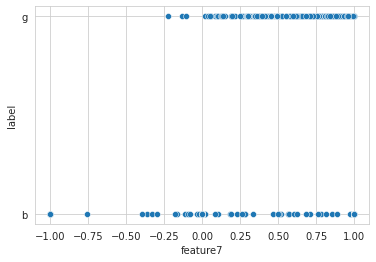

In [ ]:
sns.set_style("whitegrid");
sns.scatterplot(data=data, x="feature7", y="label")

In [ ]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [ ]:
data_plot = data.loc[:,['feature7', 'feature8', 'feature9', 'feature10', 'feature11']]

In [ ]:
data_plot

,feature7,feature8,feature9,feature10,feature11
0,0.83398,-0.37708,1.00000,0.03760,0.85243
1,-0.10868,-0.93597,1.00000,-0.04549,0.50874
2,1.00000,-0.12062,0.88965,0.01198,0.73082
3,0.71216,-1.00000,0.00000,0.00000,0.00000
4,0.92106,-0.23255,0.77152,-0.16399,0.52798
...,...,...,...,...,...
346,0.84349,-0.05567,0.90441,-0.04622,0.89391
347,0.93438,-0.01920,0.94590,0.01606,0.96510
348,0.95177,-0.03431,0.95584,0.02446,0.94124
349,0.95691,-0.03646,0.85746,0.00110,0.89724


In [ ]:
X = data.values[1:,0:34].astype(float)
Y = data.values[1:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
X.shape , Y.shape

((350, 34), (350,))

In [ ]:
#split the data into  train and test
X_normalized = MinMaxScaler().fit_transform(X)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


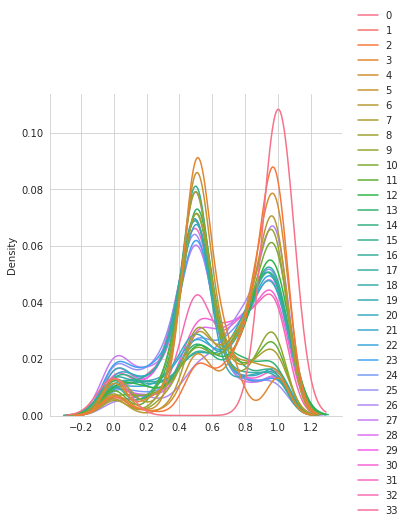

In [ ]:
sns.set_style("whitegrid");
# g = sns.PairGrid(data_plot)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
sns.displot(X_normalized, kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


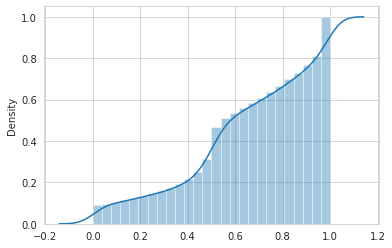

In [ ]:
kwargs = {'cumulative': True}
sns.distplot(X_normalized, hist_kws=kwargs, kde_kws=kwargs)

In [ ]:
corr_matrix = np.corrcoef(data_plot).round(decimals=2)
corr_matrix

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[1.  , 0.85, 0.97, ..., 0.97, 0.96, 0.93],
       [0.85, 1.  , 0.7 , ..., 0.74, 0.69, 0.66],
       [0.97, 0.7 , 1.  , ..., 0.98, 0.98, 0.97],
       ...,
       [0.97, 0.74, 0.98, ..., 1.  , 1.  , 0.98],
       [0.96, 0.69, 0.98, ..., 1.  , 1.  , 0.98],
       [0.93, 0.66, 0.97, ..., 0.98, 0.98, 1.  ]])

In [ ]:

#sns.heatmap(corr_matrix, annot=True, vmin=-100, vmax=100, center= 0, cmap= 'coolwarm' )

##Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((280, 34), (280,), (70, 34), (70,))

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_classif, k=5)
score_model = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(score_model.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns
df = featureScores.nlargest(5,'Score') #print 10 best features
lst_imp_col = df.Specs.to_list()
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Specs,Score
2,feature3,110.715756
4,feature5,102.566534
0,feature1,80.291925
6,feature7,77.680297
8,feature9,23.268646


##Clearly the data need to be Normalized before performing any further analysis.

#The dataset is a unbalanced dataset. The data given to us is 34 dimension data. In order for us to analyse this further, we would need to incorporate the dimensionality reduction techniques like PCA, tSNE

#Label Encoder is used here to convert the categorical labels to values

In [ ]:
#init the vectors and scalars

learning_rate = 10 ** -4


In [ ]:
#Exploratory data analysis
import time
from sklearn import manifold


tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

start_time = time.time()
X_tsne = tsne.fit_transform(X_normalized) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

1.8049054145812988


In [ ]:
#reusing the plot_embedding cod from the code walkthrough session


def plot_embedding(X, y, title=None):
    # min-max scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),)

    if title is not None:
        plt.grid(True) # just added grid to interpret easily
        plt.xscale("linear") # added this code
        plt.xlim((0,2)) # added this code
        plt.ylim((0,2)) # added this code
        plt.title(title)
    plt.show()

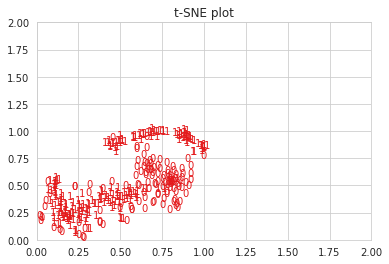

In [ ]:
plot_embedding(X_tsne, Y,"t-SNE plot" )

In [ ]:
from sklearn.decomposition import PCA
import time
pca = PCA(n_components = 34)

start_time = time.time()
pca.fit(X_normalized)
end_time = time.time()

print(end_time-start_time)

print(pca)

0.0024268627166748047
PCA(copy=True, iterated_power='auto', n_components=34, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


[3.04570423e-01 1.18862031e-01 7.69293720e-02 6.91735722e-02
 5.13880946e-02 3.65756733e-02 3.55267718e-02 2.82910151e-02
 2.62485306e-02 2.52057996e-02 2.13963848e-02 1.97397159e-02
 1.72408643e-02 1.60060919e-02 1.46309027e-02 1.35929552e-02
 1.27039050e-02 1.15143110e-02 1.10796316e-02 1.08140346e-02
 1.04867929e-02 9.35088360e-03 8.02138130e-03 7.22040570e-03
 6.83140300e-03 6.23836616e-03 5.65254806e-03 5.34248129e-03
 4.92687080e-03 4.60644098e-03 4.16702713e-03 3.38000408e-03
 2.28531557e-03 6.00659248e-32]


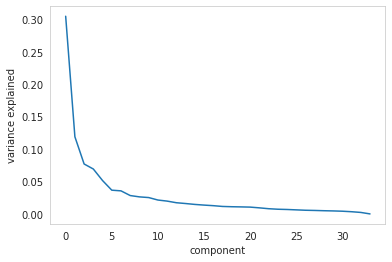

In [ ]:


import seaborn as sns

print(pca.explained_variance_ratio_) 

plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('component')
plt.ylabel('variance explained')
plt.show()


In [ ]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      pca.explained_variance_ratio_.cumsum()  )

Components =  34 ;
Total explained variance =  [0.30457042 0.42343245 0.50036183 0.5695354  0.62092349 0.65749917
 0.69302594 0.72131695 0.74756548 0.77277128 0.79416767 0.81390738
 0.83114825 0.84715434 0.86178524 0.8753782  0.8880821  0.89959641
 0.91067604 0.92149008 0.93197687 0.94132776 0.94934914 0.95656954
 0.96340095 0.96963931 0.97529186 0.98063434 0.98556121 0.99016765
 0.99433468 0.99771468 1.         1.        ]


In [ ]:
# 2-dim embeddings
pca.n_components = 2;
print(pca)

data_2 = pca.fit_transform(X_normalized)
print(data_2.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(350, 2)


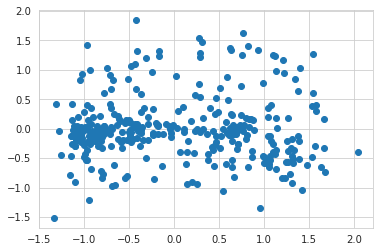

In [ ]:
plt.scatter(data_2[:,0],data_2[:,1]) #https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

We cant make out much from the PCA analysis here . Though the last 20 components explain greater than 80 % of variance , its not helpful for our analysis here.

In [ ]:
#vary the preplexity score
tsne = manifold.TSNE(n_components=2, init='pca',perplexity=5, n_iter=250,random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X_normalized) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

0.579472541809082


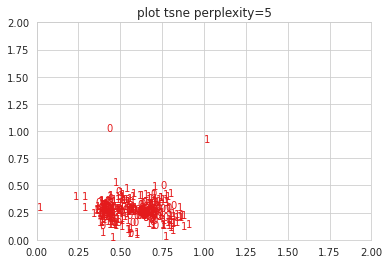

In [ ]:
plot_embedding(X_tsne,Y,"plot tsne perplexity=5")

In [ ]:
#vary the preplexity score
tsne = manifold.TSNE(n_components=2, init='pca',perplexity=15, n_iter=250,random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X_normalized) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

0.5489325523376465


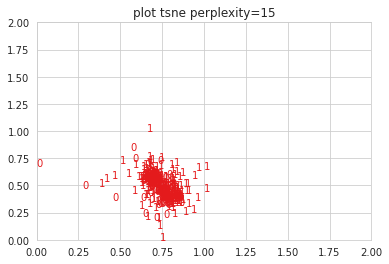

In [ ]:
plot_embedding(X_tsne,Y,"plot tsne perplexity=15")

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca',perplexity=15, n_iter=1000,random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

1.6763725280761719


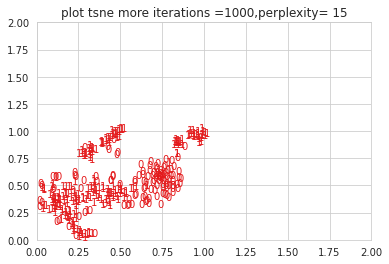

In [ ]:
plot_embedding(X_tsne,Y,"plot tsne more iterations =1000,perplexity= 15")

2.613966464996338


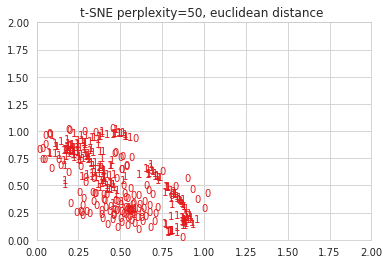

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', metric='euclidean',perplexity=50, n_iter=50000,random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

plot_embedding(X_tsne, Y,"t-SNE perplexity=50, euclidean distance " )

2.9118967056274414


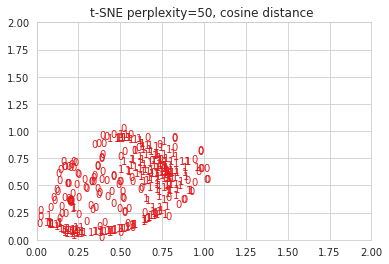

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', metric='cosine',perplexity=50, n_iter=50000,random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

plot_embedding(X_tsne, Y,"t-SNE perplexity=50, cosine distance " )

2.8927700519561768


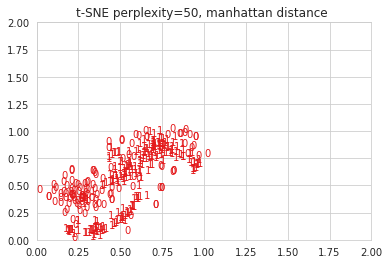

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', metric='manhattan',perplexity=50, n_iter=50000,random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

plot_embedding(X_tsne, Y,"t-SNE perplexity=50, manhattan distance " )

t-SNE plot with varyong perplexity scores were tried and for n=50k iterations data is somewhat distinguishable. Still the good and bad returns overlap. Hence a more complex analysis would be needed. Complex part of the signal may not be easy to visulaize in this tsne plot.That is one of the reasons maybe the paper researchers might have got an idea to work on deep learning models for this problem.

In [ ]:
def cost_func(weight_w,y_inp,x_inp,bias_b):

    c_parameter = 10 ** -1
    weight_w_reshaped = weight_w.reshape(1,len(weight_w))
    #calculate term1
    term1 = (1/2) * weight_w **2
    #print("shape of weight_w=",weight_w_reshaped.shape)
    #print("shape of y_inp=",y_inp.shape)
    #print("shape of x_inp=",x_inp.shape)
    sub_term = 1- (y_inp * np.matmul(x_inp,weight_w_reshaped.T))

    term2 = max(0,sub_term.all())
    
    loss_term = term1 + term2
    
    
    
    return loss_term

In [ ]:


import time

N = len(X_train)
#epochs = 11
epochs =10

W_list = []
b_list = []

loss_lst =[]
W = np.zeros_like(X_train[0])
print(W.shape)
bias_b = np.random.uniform(0,1,1)
c_parameter = 10 ** -1


start_time = time.time()
for epoch in range(1,epochs+1):
    #print("epoch=",epoch)

    loss = cost_func(W,y_train,X_train,bias_b)

    #for each iteration - iterate thro' one xj,yj
    iter = 0
    for index,(xj,yj) in enumerate(zip(X_train,y_train)):
        #print("shape of xj=",xj.shape)
        #print("shape of yj=",yj.shape)
        
        #calculate the gradient of weight and bias
 
        
        #compute grad_weight
        term_1_compute = 1 - yj * (np.dot(W.T,xj) + bias_b)
        
        
        if term_1_compute.all() <= 0:
          term_1_compute = 0
        else:
          term_1_compute = -yj * xj
        grad_weight = W + c_parameter * term_1_compute

        #compute grad_bias
        term_2_compute = 1 - yj * (np.dot(W.T,xj) + bias_b)
        if term_2_compute.all() <= 0:
          term_2_compute = 0
        else:
          term_2_compute = -yj

        grad_bias = term_2_compute
        
        #update b according to formula
        b_updated = bias_b  - learning_rate * (grad_bias)
        
        

        W_updated = W - learning_rate * (grad_weight)
        
        
        W = W_updated
        b = b_updated
        
        iter += 1
        #print("end of iter=",iter)
    
    result_loss = np.mean(loss)/N
    loss_lst.append(result_loss)
    W_list.append(np.asarray(W))
    b_list.append(b)

W_train = W
b_train = b
#Print the training loss_lst
print("Training time (LinearSVM using Stochastic Gradient descent):" + str(time.time() - start_time) + " seconds")
print("The mean of training loss lst =",loss_lst)

W = np.asarray(W)
print("W=",W)
print("b=",b)


(34,)
Training time (LinearSVM using Stochastic Gradient descent):0.1486799716949463 seconds
The mean of training loss lst = [0.0035714285714285713, 0.0035714310788152997, 0.0035714383259414853, 0.003571449920015012, 0.0035714654933546703, 0.0035714847019198627, 0.003571507223923222, 0.0035715327585215464, 0.00357156102458071, 0.0035715917595104474]
W= [0.01569828 0.         0.01439887 0.00852677 0.01413769 0.00919495
 0.0135075  0.00949526 0.01276463 0.00969138 0.01211276 0.00961279
 0.01168736 0.00929579 0.0113502  0.00901149 0.01111262 0.00833665
 0.01109099 0.00791767 0.01127413 0.00775559 0.01137302 0.00762628
 0.01159052 0.00747219 0.0117423  0.00758207 0.01161055 0.00765918
 0.01158824 0.00778327 0.01150736 0.00789688]
b= [0.53454511]


In [ ]:

test_time = time.time()

W = np.zeros_like(X_test[0])
print(W.shape)

N = len(X_test)
epochs = 10             #11
loss_lst_test = []
bias_b=np.random.uniform(0,1,1)
W_test_list=[]
b_test_list=[]
'''
Take 100 epochs

'''


for epoch in range(1,epochs+1):
    #print("epoch=",epoch)
    
    loss_test = cost_func(W,y_test,X_test,bias_b)
  
    
    #for each iteration - iterate thro' one xj,yj
    iter = 0
    for index,(xt,yt) in enumerate(zip(X_test,y_test)):
        #print("shape of xj=",xj.shape)
        #print("shape of yj=",yj.shape)
        
        
 
        
        #compute grad_weight
        term_1_compute = 1 - yt * (np.dot(W.T,xt) + bias_b)
        
        
        if term_1_compute.all() <= 0:
          term_1_compute = 0
        else:
          term_1_compute = -yt * xt
        grad_weight = W + c_parameter * term_1_compute

        #compute grad_bias
        term_2_compute = 1 - yt * (np.dot(W.T,xt) + bias_b)
        if term_2_compute.all() <= 0:
          term_2_compute = 0
        else:
          term_2_compute = -yj

        grad_bias = term_2_compute
        
        #update b according to formula
        b_updated = bias_b  - learning_rate * (grad_bias)
        
        

        W_updated = W - learning_rate * (grad_weight)
        
        
        W_test = W_updated
        b_test = b_updated
        
        iter += 1
        #print("end of iter=",iter)
    result_test_loss = np.mean(loss_test)/N
    loss_lst_test.append(result_test_loss)
    W_test_list.append(np.asarray(W_test))
    b_test_list.append(b_test)
    
W = W_test
b = b_test
#Print the training loss_lst
print("Evaluation time (Linear SVM using Gradient descent):" + str(time.time() - test_time) + " seconds")
print("The mean of test loss lst =",loss_lst_test)

W = np.asarray(W)
print("W=",W)
print("b=",b)

(34,)
Evaluation time (Linear SVM using Gradient descent):0.029963254928588867 seconds
The mean of test loss lst = [0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285]
W= [1.00000e-05 0.00000e+00 1.00000e-05 1.00000e-05 6.83500e-06 5.30790e-06
 5.64965e-06 9.63565e-06 3.62070e-06 9.67980e-06 3.42365e-06 6.88425e-06
 6.40400e-07 6.84730e-06 3.57150e-07 4.55665e-06 3.05420e-06 3.28820e-06
 2.67240e-06 8.74400e-07 4.72905e-06 3.20200e-07 6.28080e-06 3.97785e-06
 8.68960e-06 2.70250e-06 9.27355e-06 4.65845e-06 1.00000e-05 1.00000e-05
 6.93350e-06 5.01230e-06 5.88790e-06 8.98950e-06]
b= [0.3212903]


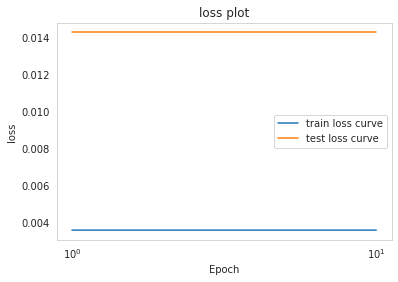

In [ ]:


lst = np.arange(10,0,-1)
epoch = [i for i in lst]
#print(epoch)


#alphas = [pow(10,i) for i in range(-3,3)]
#using logarithmic scale on x axis to make value of alpha visible
#plt.xscale('log')
my_new_list = [i  for i in loss_lst]
my_test_list = [i  for i in loss_lst_test]

plt.grid()
plt.plot(epoch,my_new_list,label='train loss curve')
plt.plot(epoch,my_test_list,label='test loss curve')

plt.xscale('log')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend()
plt.show()

In [ ]:
W_list = [np.round(W_list,3) for x in W_list]


W_test_list = [np.round(W_test_list,3) for x in W_test_list]



if(np.array_equal(W_list, W_test_list)):
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 

The lists are not identical


In [ ]:
print("before sorting")
b_list = [np.round(x,3) for x in b_list]
print(b_list)
b_test_list = [np.round(x,3) for x in b_test_list]
print(b_test_list)
b_list.sort()
b_test_list.sort()

print("after sorting")
print(b_list)
print(b_test_list)
if b_list == b_test_list: 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 

before sorting
[array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535])]
[array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321])]
after sorting
[array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535]), array([0.535])]
[array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321]), array([0.321])]
The lists are not identical


In [ ]:
#calculate threshold first

y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(W, X_test[i])) #model
    y_test_predicted = np.append(y_test_predicted, yp)
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test, y_test_predicted)))
print("precision on test dataset: {}".format(recall_score(y_test, y_test_predicted)))
precision = precision_score(y_test_predicted, y_test)
recall = recall_score(y_test_predicted, y_test)
f1_score = 2 * (precision * recall) / (precision + recall)
print("f1_score=",f1_score)




accuracy on test dataset: 0.6285714285714286
recall on test dataset: 1.0
precision on test dataset: 1.0
f1_score= 0.7719298245614035


### Verification step 
Use  SGD classifier with hinge loss and weights returned compare with weigths calculated

In [ ]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(alpha=0.1,loss='hinge',class_weight=None, eta0=10**-4,learning_rate='constant',
        penalty='l2',
        random_state=15,n_iter_no_change=10,
        verbose=2)
clf

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='hinge', max_iter=1000,
              n_iter_no_change=10, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=15, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=2, warm_start=False)

In [ ]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.04, NNZs: 33, Bias: 0.008000, T: 280, Avg. loss: 0.973750
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.08, NNZs: 33, Bias: 0.016000, T: 560, Avg. loss: 0.919665
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 33, Bias: 0.024000, T: 840, Avg. loss: 0.865754
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.15, NNZs: 33, Bias: 0.032000, T: 1120, Avg. loss: 0.812008
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.19, NNZs: 33, Bias: 0.040000, T: 1400, Avg. loss: 0.758300
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.22, NNZs: 33, Bias: 0.047100, T: 1680, Avg. loss: 0.707671
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 33, Bias: 0.048500, T: 1960, Avg. loss: 0.686993
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.24, NNZs: 33, Bias: 0.049100, T: 2240, Avg. loss: 0.684007
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.24, NNZs: 33, Bias: 0.048600, T: 2520, Avg. loss: 0.682575
Total training time: 

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='hinge', max_iter=1000,
              n_iter_no_change=10, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=15, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[ 1.49322950e-01,  0.00000000e+00,  1.19152411e-01,
          4.89056167e-02,  1.16401037e-01,  6.26641588e-02,
          8.98610528e-02,  8.95352953e-02,  4.14241786e-02,
          5.66254107e-02,  2.49205747e-02,  7.30509028e-02,
          2.07720760e-02,  7.14210178e-02,  3.03950108e-02,
          5.80867541e-02, -7.54813465e-03,  3.12319141e-02,
         -7.27074421e-06,  1.73289596e-02,  3.69724666e-02,
         -2.52051506e-02,  2.93901276e-02,  2.19299269e-03,
          2.86917080e-02, -2.37103810e-03, -4.23123761e-02,
          1.63761071e-02,  4.68022100e-02,  4.02562991e-03,
          5.21033712e-02, -8.12738055e-03,  4.69246941e-02,
         -3.86405651e-03]]), (1, 34), array([0.0281]))

In [ ]:
W_train.T-clf.coef_, b_train-clf.intercept_

(array([[-0.13362467,  0.        , -0.10475354, -0.04037885, -0.10226334,
         -0.05346921, -0.07635356, -0.08004004, -0.02865955, -0.04693403,
         -0.01280781, -0.06343811, -0.00908472, -0.06212523, -0.01904481,
         -0.04907526,  0.01866075, -0.02289527,  0.01109826, -0.00941129,
         -0.02569834,  0.03296074, -0.0180171 ,  0.00543328, -0.01710119,
          0.00984322,  0.05405467, -0.00879404, -0.03519166,  0.00363355,
         -0.04051513,  0.01591065, -0.03541733,  0.01176093]]),
 array([0.50644511]))

In [ ]:
y_train_pred = clf.predict(X_train)
#y_train_pred = y_train_mid[:,1]


y_test_pred = clf.predict(X_test)

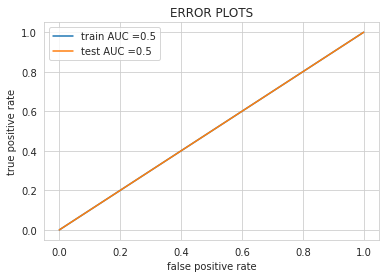

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

test_AUC =str(auc(test_fpr, test_tpr))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.grid()
plt.legend()

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
print("="*100)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("trainaccurcay=",accuracy_score(y_train, y_train_pred))

print("testaccurcay=",accuracy_score(y_test, y_test_pred))
target_names = ['g', 'b']

print(classification_report(y_test, y_test_pred, target_names=target_names,zero_division=1))

trainaccurcay= 0.6428571428571429
testaccurcay= 0.6285714285714286
              precision    recall  f1-score   support

           g       1.00      0.00      0.00        26
           b       0.63      1.00      0.77        44

    accuracy                           0.63        70
   macro avg       0.81      0.50      0.39        70
weighted avg       0.77      0.63      0.49        70



In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

#find the feature impotances by using multiple feature selection methods
#refered link https://scikit-learn.org/stable/auto_examples/compose/plot_feature_union.html#sphx-glr-auto-examples-compose-plot-feature-union-py

pca = PCA(n_components=5)


selection = SelectKBest(k=5)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

X_features = combined_features.fit(X_train, y_train).transform(X_train)
#print("Combined space has", X_features.shape[1], "features")

pipeline = Pipeline([("features", combined_features), ("sgd", clf)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  sgd__alpha=[0.1,10,100])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=0)
grid_search.fit(X_train, y_train)
#print(grid_search.best_estimator_)
#print(grid_search.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn

-- Epoch 1
Norm: 0.01, NNZs: 2, Bias: 0.006400, T: 224, Avg. loss: 0.997222
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 2, Bias: 0.012800, T: 448, Avg. loss: 0.991424
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 2, Bias: 0.019200, T: 672, Avg. loss: 0.985637
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 2, Bias: 0.025600, T: 896, Avg. loss: 0.979858
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 2, Bias: 0.032000, T: 1120, Avg. loss: 0.974086
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 2, Bias: 0.038400, T: 1344, Avg. loss: 0.968327
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 2, Bias: 0.044800, T: 1568, Avg. loss: 0.962569
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 2, Bias: 0.051200, T: 1792, Avg. loss: 0.956823
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.08, NNZs: 2, Bias: 0.057600, T: 2016, Avg. loss: 0.951087
Total training time: 0.01 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.04, NNZs: 2, Bias: 0.070400, T: 2464, Avg. loss: 0.964303
Total training time: 0.01 seconds.
-- Epoch 12
Norm: 0.04, NNZs: 2, Bias: 0.076800, T: 2688, Avg. loss: 0.962205
Total training time: 0.02 seconds.
-- Epoch 13
Norm: 0.04, NNZs: 2, Bias: 0.083200, T: 2912, Avg. loss: 0.959849
Total training time: 0.02 seconds.
-- Epoch 14
Norm: 0.04, NNZs: 2, Bias: 0.089600, T: 3136, Avg. loss: 0.958132
Total training time: 0.02 seconds.
-- Epoch 15
Norm: 0.04, NNZs: 2, Bias: 0.096000, T: 3360, Avg. loss: 0.956161
Total training time: 0.02 seconds.
-- Epoch 16
Norm: 0.04, NNZs: 2, Bias: 0.102400, T: 3584, Avg. loss: 0.954064
Total training time: 0.02 seconds.
-- Epoch 17
Norm: 0.04, NNZs: 2, Bias: 0.108800, T: 3808, Avg. loss: 0.951988
Total training time: 0.02 seconds.
-- Epoch 18
Norm: 0.04, NNZs: 2, Bias: 0.115200, T: 4032, Avg. loss: 0.950333
Total training time: 0.02 seconds.
-- Epoch 19
Norm: 0.04, NNZs: 2, Bias: 0.121600, T: 4256, Avg. loss: 0.948032
Total training time: 0.02 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.04, NNZs: 2, Bias: 0.121600, T: 4256, Avg. loss: 0.948710
Total training time: 0.03 seconds.
-- Epoch 20
Norm: 0.04, NNZs: 2, Bias: 0.128000, T: 4480, Avg. loss: 0.946859
Total training time: 0.03 seconds.
-- Epoch 21
Norm: 0.04, NNZs: 2, Bias: 0.134400, T: 4704, Avg. loss: 0.945280
Total training time: 0.03 seconds.
-- Epoch 22
Norm: 0.04, NNZs: 2, Bias: 0.140800, T: 4928, Avg. loss: 0.943532
Total training time: 0.03 seconds.
-- Epoch 23
Norm: 0.04, NNZs: 2, Bias: 0.147200, T: 5152, Avg. loss: 0.941530
Total training time: 0.03 seconds.
-- Epoch 24
Norm: 0.04, NNZs: 2, Bias: 0.153600, T: 5376, Avg. loss: 0.939398
Total training time: 0.03 seconds.
-- Epoch 25
Norm: 0.04, NNZs: 2, Bias: 0.160000, T: 5600, Avg. loss: 0.937853
Total training time: 0.03 seconds.
-- Epoch 26
Norm: 0.04, NNZs: 2, Bias: 0.166400, T: 5824, Avg. loss: 0.936087
Total training time: 0.03 seconds.
-- Epoch 27
Norm: 0.04, NNZs: 2, Bias: 0.172800, T: 6048, Avg. loss: 0.934105
Total training time: 0.03 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw



Total training time: 0.11 seconds.
-- Epoch 149
Norm: 0.00, NNZs: 2, Bias: 0.953600, T: 33376, Avg. loss: 0.726564
Total training time: 0.11 seconds.
-- Epoch 150
Norm: 0.00, NNZs: 2, Bias: 0.960000, T: 33600, Avg. loss: 0.725145
Total training time: 0.12 seconds.
-- Epoch 151
Norm: 0.00, NNZs: 2, Bias: 0.966400, T: 33824, Avg. loss: 0.723115
Total training time: 0.13 seconds.
-- Epoch 152
Norm: 0.00, NNZs: 2, Bias: 0.972800, T: 34048, Avg. loss: 0.721156
Total training time: 0.13 seconds.
-- Epoch 153
Norm: 0.00, NNZs: 2, Bias: 0.979200, T: 34272, Avg. loss: 0.719560
Total training time: 0.13 seconds.
-- Epoch 154
Norm: 0.00, NNZs: 2, Bias: 0.985600, T: 34496, Avg. loss: 0.717406
Total training time: 0.13 seconds.
-- Epoch 155
Norm: 0.00, NNZs: 2, Bias: 0.992000, T: 34720, Avg. loss: 0.715800
Total training time: 0.13 seconds.
-- Epoch 156
Norm: 0.00, NNZs: 2, Bias: 0.996600, T: 34944, Avg. loss: 0.714388
Total training time: 0.13 seconds.
-- Epoch 157
Norm: 0.00, NNZs: 2, Bias: 0.99

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.00, NNZs: 2, Bias: 0.153600, T: 5376, Avg. loss: 0.955203
Total training time: 0.02 seconds.
-- Epoch 25
Norm: 0.00, NNZs: 2, Bias: 0.160000, T: 5600, Avg. loss: 0.953648
Total training time: 0.02 seconds.
-- Epoch 26
Norm: 0.00, NNZs: 2, Bias: 0.166400, T: 5824, Avg. loss: 0.951741
Total training time: 0.02 seconds.
-- Epoch 27
Norm: 0.00, NNZs: 2, Bias: 0.172800, T: 6048, Avg. loss: 0.949859
Total training time: 0.03 seconds.
-- Epoch 28
Norm: 0.00, NNZs: 2, Bias: 0.179200, T: 6272, Avg. loss: 0.948031
Total training time: 0.03 seconds.
-- Epoch 29
Norm: 0.00, NNZs: 2, Bias: 0.185600, T: 6496, Avg. loss: 0.946248
Total training time: 0.03 seconds.
-- Epoch 30
Norm: 0.00, NNZs: 2, Bias: 0.192000, T: 6720, Avg. loss: 0.944445
Total training time: 0.03 seconds.
-- Epoch 31
Norm: 0.00, NNZs: 2, Bias: 0.198400, T: 6944, Avg. loss: 0.942545
Total training time: 0.03 seconds.
-- Epoch 32
Norm: 0.00, NNZs: 2, Bias: 0.204800, T: 7168, Avg. loss: 0.940703
Total training time: 0.03 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.00, NNZs: 2, Bias: 0.096000, T: 3360, Avg. loss: 0.972041
Total training time: 0.04 seconds.
-- Epoch 16
Norm: 0.00, NNZs: 2, Bias: 0.102400, T: 3584, Avg. loss: 0.970183
Total training time: 0.04 seconds.
-- Epoch 17
Norm: 0.00, NNZs: 2, Bias: 0.108800, T: 3808, Avg. loss: 0.968378
Total training time: 0.04 seconds.
-- Epoch 18
Norm: 0.00, NNZs: 2, Bias: 0.115200, T: 4032, Avg. loss: 0.966566
Total training time: 0.04 seconds.
-- Epoch 19
Norm: 0.00, NNZs: 2, Bias: 0.121600, T: 4256, Avg. loss: 0.964601
Total training time: 0.04 seconds.
-- Epoch 20
Norm: 0.00, NNZs: 2, Bias: 0.128000, T: 4480, Avg. loss: 0.962877
Total training time: 0.04 seconds.
-- Epoch 21
Norm: 0.00, NNZs: 2, Bias: 0.134400, T: 4704, Avg. loss: 0.961103
Total training time: 0.04 seconds.
-- Epoch 22
Norm: 0.00, NNZs: 2, Bias: 0.140800, T: 4928, Avg. loss: 0.959261
Total training time: 0.04 seconds.
-- Epoch 23
Norm: 0.00, NNZs: 2, Bias: 0.147200, T: 5152, Avg. loss: 0.957451
Total training time: 0.04 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.01, NNZs: 3, Bias: 0.006400, T: 224, Avg. loss: 0.995683
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 3, Bias: 0.012800, T: 448, Avg. loss: 0.986740
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 3, Bias: 0.019200, T: 672, Avg. loss: 0.977814
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 3, Bias: 0.025600, T: 896, Avg. loss: 0.968899
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 3, Bias: 0.032000, T: 1120, Avg. loss: 0.960002
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.08, NNZs: 3, Bias: 0.038400, T: 1344, Avg. loss: 0.951129
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.09, NNZs: 3, Bias: 0.044800, T: 1568, Avg. loss: 0.942257
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.10, NNZs: 3, Bias: 0.051200, T: 1792, Avg. loss: 0.933405
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.11, NNZs: 3, Bias: 0.057600, T: 2016, Avg. loss: 0.924576
Total training time: 0.00 seconds.
-- Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.27, NNZs: 3, Bias: 0.147200, T: 5152, Avg. loss: 0.821894
Total training time: 0.01 seconds.
-- Epoch 24
Norm: 0.28, NNZs: 3, Bias: 0.153600, T: 5376, Avg. loss: 0.814091
Total training time: 0.01 seconds.
-- Epoch 25
Norm: 0.29, NNZs: 3, Bias: 0.160000, T: 5600, Avg. loss: 0.806345
Total training time: 0.01 seconds.
-- Epoch 26
Norm: 0.30, NNZs: 3, Bias: 0.166400, T: 5824, Avg. loss: 0.798622
Total training time: 0.01 seconds.
-- Epoch 27
Norm: 0.31, NNZs: 3, Bias: 0.172800, T: 6048, Avg. loss: 0.790896
Total training time: 0.01 seconds.
-- Epoch 28
Norm: 0.32, NNZs: 3, Bias: 0.179200, T: 6272, Avg. loss: 0.783191
Total training time: 0.01 seconds.
-- Epoch 29
Norm: 0.33, NNZs: 3, Bias: 0.185600, T: 6496, Avg. loss: 0.775482
Total training time: 0.01 seconds.
-- Epoch 30
Norm: 0.34, NNZs: 3, Bias: 0.192000, T: 6720, Avg. loss: 0.767823
Total training time: 0.01 seconds.
-- Epoch 31
Norm: 0.35, NNZs: 3, Bias: 0.198400, T: 6944, Avg. loss: 0.760133
Total training time: 0.01 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.01, NNZs: 3, Bias: 0.006400, T: 224, Avg. loss: 0.995932
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 3, Bias: 0.012800, T: 448, Avg. loss: 0.988402
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 3, Bias: 0.019200, T: 672, Avg. loss: 0.982126
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 3, Bias: 0.025600, T: 896, Avg. loss: 0.976431
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 3, Bias: 0.032000, T: 1120, Avg. loss: 0.971624
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 3, Bias: 0.038400, T: 1344, Avg. loss: 0.967882
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 3, Bias: 0.044800, T: 1568, Avg. loss: 0.963788
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.05, NNZs: 3, Bias: 0.051200, T: 1792, Avg. loss: 0.960344
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.05, NNZs: 3, Bias: 0.057600, T: 2016, Avg. loss: 0.957506
Total training time: 0.00 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.06, NNZs: 3, Bias: 0.505600, T: 17696, Avg. loss: 0.825583
Total training time: 0.20 seconds.
-- Epoch 80
Norm: 0.06, NNZs: 3, Bias: 0.512000, T: 17920, Avg. loss: 0.824017
Total training time: 0.20 seconds.
-- Epoch 81
Norm: 0.06, NNZs: 3, Bias: 0.518400, T: 18144, Avg. loss: 0.822170
Total training time: 0.20 seconds.
-- Epoch 82
Norm: 0.06, NNZs: 3, Bias: 0.524800, T: 18368, Avg. loss: 0.820352
Total training time: 0.22 seconds.
-- Epoch 83
Norm: 0.06, NNZs: 3, Bias: 0.531200, T: 18592, Avg. loss: 0.818427
Total training time: 0.22 seconds.
-- Epoch 84
Norm: 0.06, NNZs: 3, Bias: 0.537600, T: 18816, Avg. loss: 0.816736
Total training time: 0.22 seconds.
-- Epoch 85
Norm: 0.06, NNZs: 3, Bias: 0.544000, T: 19040, Avg. loss: 0.815019
Total training time: 0.22 seconds.
-- Epoch 86
Norm: 0.06, NNZs: 3, Bias: 0.550400, T: 19264, Avg. loss: 0.813122
Total training time: 0.22 seconds.
-- Epoch 87
Norm: 0.06, NNZs: 3, Bias: 0.556800, T: 19488, Avg. loss: 0.810567
Total training time: 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.00, NNZs: 3, Bias: 0.006400, T: 224, Avg. loss: 0.997457
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3, Bias: 0.012800, T: 448, Avg. loss: 0.994428
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 3, Bias: 0.019200, T: 672, Avg. loss: 0.992689
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 3, Bias: 0.025600, T: 896, Avg. loss: 0.990810
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 3, Bias: 0.032000, T: 1120, Avg. loss: 0.988803
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 3, Bias: 0.038400, T: 1344, Avg. loss: 0.987234
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 3, Bias: 0.044800, T: 1568, Avg. loss: 0.985019
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 3, Bias: 0.051200, T: 1792, Avg. loss: 0.983229
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 3, Bias: 0.057600, T: 2016, Avg. loss: 0.981620
Total training time: 0.02 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.01, NNZs: 3, Bias: 0.371200, T: 12992, Avg. loss: 0.891854
Total training time: 0.04 seconds.
-- Epoch 59
Norm: 0.00, NNZs: 3, Bias: 0.377600, T: 13216, Avg. loss: 0.889660
Total training time: 0.04 seconds.
-- Epoch 60
Norm: 0.01, NNZs: 3, Bias: 0.384000, T: 13440, Avg. loss: 0.888231
Total training time: 0.04 seconds.
-- Epoch 61
Norm: 0.01, NNZs: 3, Bias: 0.390400, T: 13664, Avg. loss: 0.886322
Total training time: 0.06 seconds.
-- Epoch 62
Norm: 0.01, NNZs: 3, Bias: 0.396800, T: 13888, Avg. loss: 0.884658
Total training time: 0.08 seconds.
-- Epoch 63
Norm: 0.01, NNZs: 3, Bias: 0.403200, T: 14112, Avg. loss: 0.882559
Total training time: 0.09 seconds.
-- Epoch 64
Norm: 0.01, NNZs: 3, Bias: 0.409600, T: 14336, Avg. loss: 0.880729
Total training time: 0.09 seconds.
-- Epoch 65
Norm: 0.01, NNZs: 3, Bias: 0.416000, T: 14560, Avg. loss: 0.878989
Total training time: 0.09 seconds.
-- Epoch 66
Norm: 0.01, NNZs: 3, Bias: 0.422400, T: 14784, Avg. loss: 0.877371
Total training time: 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 79
Norm: 0.01, NNZs: 3, Bias: 0.505600, T: 17696, Avg. loss: 0.853397
Total training time: 0.06 seconds.
-- Epoch 80
Norm: 0.01, NNZs: 3, Bias: 0.512000, T: 17920, Avg. loss: 0.851729
Total training time: 0.06 seconds.
-- Epoch 81
Norm: 0.01, NNZs: 3, Bias: 0.518400, T: 18144, Avg. loss: 0.849845
Total training time: 0.06 seconds.
-- Epoch 82
Norm: 0.01, NNZs: 3, Bias: 0.524800, T: 18368, Avg. loss: 0.847995
Total training time: 0.07 seconds.
-- Epoch 83
Norm: 0.01, NNZs: 3, Bias: 0.531200, T: 18592, Avg. loss: 0.846020
Total training time: 0.07 seconds.
-- Epoch 84
Norm: 0.01, NNZs: 3, Bias: 0.537600, T: 18816, Avg. loss: 0.844479
Total training time: 0.07 seconds.
-- Epoch 85
Norm: 0.01, NNZs: 3, Bias: 0.544000, T: 19040, Avg. loss: 0.842608
Total training time: 0.07 seconds.
-- Epoch 86
Norm: 0.01, NNZs: 3, Bias: 0.550400, T: 19264, Avg. loss: 0.840643
Total training time: 0.07 seconds.
-- Epoch 87
Norm: 0.00, NNZs: 3, Bias: 0.556800, T: 19488, Avg. loss: 0.838547
Total tra

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw



Norm: 0.32, NNZs: 3, Bias: 0.211200, T: 7392, Avg. loss: 0.800712
Total training time: 0.06 seconds.
-- Epoch 34
Norm: 0.33, NNZs: 3, Bias: 0.217600, T: 7616, Avg. loss: 0.794733
Total training time: 0.06 seconds.
-- Epoch 35
Norm: 0.34, NNZs: 3, Bias: 0.224000, T: 7840, Avg. loss: 0.788757
Total training time: 0.06 seconds.
-- Epoch 36
Norm: 0.35, NNZs: 3, Bias: 0.230400, T: 8064, Avg. loss: 0.782814
Total training time: 0.06 seconds.
-- Epoch 37
Norm: 0.36, NNZs: 3, Bias: 0.236800, T: 8288, Avg. loss: 0.776870
Total training time: 0.06 seconds.
-- Epoch 38
Norm: 0.36, NNZs: 3, Bias: 0.243200, T: 8512, Avg. loss: 0.770922
Total training time: 0.06 seconds.
-- Epoch 39
Norm: 0.37, NNZs: 3, Bias: 0.249600, T: 8736, Avg. loss: 0.764979
Total training time: 0.06 seconds.
-- Epoch 40
Norm: 0.38, NNZs: 3, Bias: 0.256000, T: 8960, Avg. loss: 0.759085
Total training time: 0.07 seconds.
-- Epoch 41
Norm: 0.39, NNZs: 3, Bias: 0.262400, T: 9184, Avg. loss: 0.753156
Total training time: 0.07 sec

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.01, NNZs: 3, Bias: 0.006400, T: 224, Avg. loss: 0.997472
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 3, Bias: 0.012800, T: 448, Avg. loss: 0.992146
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 3, Bias: 0.019200, T: 672, Avg. loss: 0.986826
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 3, Bias: 0.025600, T: 896, Avg. loss: 0.981515
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 3, Bias: 0.032000, T: 1120, Avg. loss: 0.976216
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 3, Bias: 0.038400, T: 1344, Avg. loss: 0.970918
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 3, Bias: 0.044800, T: 1568, Avg. loss: 0.965628
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 3, Bias: 0.051200, T: 1792, Avg. loss: 0.960352
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.08, NNZs: 3, Bias: 0.057600, T: 2016, Avg. loss: 0.955079
Total training time: 0.02 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 128
Norm: 0.04, NNZs: 3, Bias: 0.819200, T: 28672, Avg. loss: 0.747094
Total training time: 0.19 seconds.
-- Epoch 129
Norm: 0.04, NNZs: 3, Bias: 0.825600, T: 28896, Avg. loss: 0.745283
Total training time: 0.19 seconds.
-- Epoch 130
Norm: 0.04, NNZs: 3, Bias: 0.832000, T: 29120, Avg. loss: 0.743500
Total training time: 0.19 seconds.
-- Epoch 131
Norm: 0.04, NNZs: 3, Bias: 0.838400, T: 29344, Avg. loss: 0.741488
Total training time: 0.19 seconds.
-- Epoch 132
Norm: 0.04, NNZs: 3, Bias: 0.844800, T: 29568, Avg. loss: 0.739793
Total training time: 0.19 seconds.
-- Epoch 133
Norm: 0.04, NNZs: 3, Bias: 0.851200, T: 29792, Avg. loss: 0.737748
Total training time: 0.19 seconds.
-- Epoch 134
Norm: 0.04, NNZs: 3, Bias: 0.857600, T: 30016, Avg. loss: 0.735808
Total training time: 0.20 seconds.
-- Epoch 135
Norm: 0.04, NNZs: 3, Bias: 0.864000, T: 30240, Avg. loss: 0.734146
Total training time: 0.20 seconds.
-- Epoch 136
Norm: 0.04, NNZs: 3, Bias: 0.870400, T: 30464, Avg. loss: 0.732364


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.03, NNZs: 3, Bias: 0.044800, T: 1568, Avg. loss: 0.973275
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.04, NNZs: 3, Bias: 0.051200, T: 1792, Avg. loss: 0.970682
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.04, NNZs: 3, Bias: 0.057600, T: 2016, Avg. loss: 0.968298
Total training time: 0.02 seconds.
-- Epoch 10
Norm: 0.04, NNZs: 3, Bias: 0.064000, T: 2240, Avg. loss: 0.965704
Total training time: 0.02 seconds.
-- Epoch 11
Norm: 0.04, NNZs: 3, Bias: 0.070400, T: 2464, Avg. loss: 0.963425
Total training time: 0.02 seconds.
-- Epoch 12
Norm: 0.04, NNZs: 3, Bias: 0.076800, T: 2688, Avg. loss: 0.961194
Total training time: 0.02 seconds.
-- Epoch 13
Norm: 0.04, NNZs: 3, Bias: 0.083200, T: 2912, Avg. loss: 0.959117
Total training time: 0.02 seconds.
-- Epoch 14
Norm: 0.04, NNZs: 3, Bias: 0.089600, T: 3136, Avg. loss: 0.957282
Total training time: 0.02 seconds.
-- Epoch 15
Norm: 0.04, NNZs: 3, Bias: 0.096000, T: 3360, Avg. loss: 0.955173
Total training time: 0.02 second

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 141
Norm: 0.04, NNZs: 3, Bias: 0.902400, T: 31584, Avg. loss: 0.727692
Total training time: 0.14 seconds.
-- Epoch 142
Norm: 0.04, NNZs: 3, Bias: 0.908800, T: 31808, Avg. loss: 0.725746
Total training time: 0.14 seconds.
-- Epoch 143
Norm: 0.04, NNZs: 3, Bias: 0.915200, T: 32032, Avg. loss: 0.723649
Total training time: 0.14 seconds.
-- Epoch 144
Norm: 0.04, NNZs: 3, Bias: 0.921600, T: 32256, Avg. loss: 0.722312
Total training time: 0.14 seconds.
-- Epoch 145
Norm: 0.04, NNZs: 3, Bias: 0.928000, T: 32480, Avg. loss: 0.720238
Total training time: 0.14 seconds.
-- Epoch 146
Norm: 0.04, NNZs: 3, Bias: 0.934400, T: 32704, Avg. loss: 0.718451
Total training time: 0.14 seconds.
-- Epoch 147
Norm: 0.04, NNZs: 3, Bias: 0.940800, T: 32928, Avg. loss: 0.716526
Total training time: 0.14 seconds.
-- Epoch 148
Norm: 0.04, NNZs: 3, Bias: 0.947000, T: 33152, Avg. loss: 0.714828
Total training time: 0.14 seconds.
-- Epoch 149
Norm: 0.04, NNZs: 3, Bias: 0.951800, T: 33376, Avg. loss: 0.713666


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.00, NNZs: 3, Bias: 0.505600, T: 17696, Avg. loss: 0.854329
Total training time: 0.14 seconds.
-- Epoch 80
Norm: 0.00, NNZs: 3, Bias: 0.512000, T: 17920, Avg. loss: 0.852745
Total training time: 0.14 seconds.
-- Epoch 81
Norm: 0.00, NNZs: 3, Bias: 0.518400, T: 18144, Avg. loss: 0.850977
Total training time: 0.15 seconds.
-- Epoch 82
Norm: 0.00, NNZs: 3, Bias: 0.524800, T: 18368, Avg. loss: 0.849118
Total training time: 0.15 seconds.
-- Epoch 83
Norm: 0.00, NNZs: 3, Bias: 0.531200, T: 18592, Avg. loss: 0.847114
Total training time: 0.15 seconds.
-- Epoch 84
Norm: 0.00, NNZs: 3, Bias: 0.537600, T: 18816, Avg. loss: 0.845417
Total training time: 0.15 seconds.
-- Epoch 85
Norm: 0.00, NNZs: 3, Bias: 0.544000, T: 19040, Avg. loss: 0.843668
Total training time: 0.15 seconds.
-- Epoch 86
Norm: 0.00, NNZs: 3, Bias: 0.550400, T: 19264, Avg. loss: 0.841729
Total training time: 0.15 seconds.
-- Epoch 87
Norm: 0.00, NNZs: 3, Bias: 0.556800, T: 19488, Avg. loss: 0.839946
Total training time: 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Total training time: 0.11 seconds.
-- Epoch 47
Norm: 0.00, NNZs: 3, Bias: 0.300800, T: 10528, Avg. loss: 0.913227
Total training time: 0.11 seconds.
-- Epoch 48
Norm: 0.00, NNZs: 3, Bias: 0.307200, T: 10752, Avg. loss: 0.911347
Total training time: 0.11 seconds.
-- Epoch 49
Norm: 0.00, NNZs: 3, Bias: 0.313600, T: 10976, Avg. loss: 0.909487
Total training time: 0.11 seconds.
-- Epoch 50
Norm: 0.00, NNZs: 3, Bias: 0.320000, T: 11200, Avg. loss: 0.907633
Total training time: 0.11 seconds.
-- Epoch 51
Norm: 0.00, NNZs: 3, Bias: 0.326400, T: 11424, Avg. loss: 0.905942
Total training time: 0.11 seconds.
-- Epoch 52
Norm: 0.00, NNZs: 3, Bias: 0.332800, T: 11648, Avg. loss: 0.903997
Total training time: 0.12 seconds.
-- Epoch 53
Norm: 0.00, NNZs: 3, Bias: 0.339200, T: 11872, Avg. loss: 0.902236
Total training time: 0.12 seconds.
-- Epoch 54
Norm: 0.00, NNZs: 3, Bias: 0.345600, T: 12096, Avg. loss: 0.900516
Total training time: 0.12 seconds.
-- Epoch 55
Norm: 0.00, NNZs: 3, Bias: 0.352000, T: 1

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn


-- Epoch 24
Norm: 0.29, NNZs: 4, Bias: 0.153600, T: 5376, Avg. loss: 0.798686
Total training time: 0.00 seconds.
-- Epoch 25
Norm: 0.30, NNZs: 4, Bias: 0.160000, T: 5600, Avg. loss: 0.790291
Total training time: 0.00 seconds.
-- Epoch 26
Norm: 0.31, NNZs: 4, Bias: 0.166400, T: 5824, Avg. loss: 0.781921
Total training time: 0.00 seconds.
-- Epoch 27
Norm: 0.33, NNZs: 4, Bias: 0.172800, T: 6048, Avg. loss: 0.773554
Total training time: 0.00 seconds.
-- Epoch 28
Norm: 0.34, NNZs: 4, Bias: 0.179200, T: 6272, Avg. loss: 0.765222
Total training time: 0.00 seconds.
-- Epoch 29
Norm: 0.35, NNZs: 4, Bias: 0.185600, T: 6496, Avg. loss: 0.756859
Total training time: 0.00 seconds.
-- Epoch 30
Norm: 0.36, NNZs: 4, Bias: 0.192000, T: 6720, Avg. loss: 0.748560
Total training time: 0.00 seconds.
-- Epoch 31
Norm: 0.37, NNZs: 4, Bias: 0.198400, T: 6944, Avg. loss: 0.740264
Total training time: 0.00 seconds.
-- Epoch 32
Norm: 0.38, NNZs: 4, Bias: 0.204800, T: 7168, Avg. loss: 0.731982
Total training ti

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.04, NNZs: 4, Bias: 0.019200, T: 672, Avg. loss: 0.979904
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 4, Bias: 0.025600, T: 896, Avg. loss: 0.971820
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 4, Bias: 0.032000, T: 1120, Avg. loss: 0.963759
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4, Bias: 0.038400, T: 1344, Avg. loss: 0.955699
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 4, Bias: 0.044800, T: 1568, Avg. loss: 0.947654
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.09, NNZs: 4, Bias: 0.051200, T: 1792, Avg. loss: 0.939634
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.11, NNZs: 4, Bias: 0.057600, T: 2016, Avg. loss: 0.931618
Total training time: 0.01 seconds.
-- Epoch 10
Norm: 0.12, NNZs: 4, Bias: 0.064000, T: 2240, Avg. loss: 0.923614
Total training time: 0.01 seconds.
-- Epoch 11
Norm: 0.13, NNZs: 4, Bias: 0.070400, T: 2464, Avg. loss: 0.915622
Total training time: 0.01 seconds.
-- 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 124
Norm: 0.06, NNZs: 4, Bias: 0.793600, T: 27776, Avg. loss: 0.741623
Total training time: 0.13 seconds.
-- Epoch 125
Norm: 0.06, NNZs: 4, Bias: 0.800000, T: 28000, Avg. loss: 0.739931
Total training time: 0.13 seconds.
-- Epoch 126
Norm: 0.06, NNZs: 4, Bias: 0.806400, T: 28224, Avg. loss: 0.738164
Total training time: 0.13 seconds.
-- Epoch 127
Norm: 0.06, NNZs: 4, Bias: 0.812800, T: 28448, Avg. loss: 0.735984
Total training time: 0.13 seconds.
-- Epoch 128
Norm: 0.06, NNZs: 4, Bias: 0.819200, T: 28672, Avg. loss: 0.734535
Total training time: 0.13 seconds.
-- Epoch 129
Norm: 0.06, NNZs: 4, Bias: 0.825600, T: 28896, Avg. loss: 0.732826
Total training time: 0.13 seconds.
-- Epoch 130
Norm: 0.06, NNZs: 4, Bias: 0.832000, T: 29120, Avg. loss: 0.731012
Total training time: 0.13 seconds.
-- Epoch 131
Norm: 0.06, NNZs: 4, Bias: 0.838400, T: 29344, Avg. loss: 0.728840
Total training time: 0.13 seconds.
-- Epoch 132
Norm: 0.06, NNZs: 4, Bias: 0.844800, T: 29568, Avg. loss: 0.727285


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.01, NNZs: 4, Bias: 0.006400, T: 224, Avg. loss: 0.995865
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4, Bias: 0.012800, T: 448, Avg. loss: 0.988178
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4, Bias: 0.019200, T: 672, Avg. loss: 0.981602
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 4, Bias: 0.025600, T: 896, Avg. loss: 0.975878
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 4, Bias: 0.032000, T: 1120, Avg. loss: 0.971719
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 4, Bias: 0.038400, T: 1344, Avg. loss: 0.967179
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.05, NNZs: 4, Bias: 0.044800, T: 1568, Avg. loss: 0.962960
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.05, NNZs: 4, Bias: 0.051200, T: 1792, Avg. loss: 0.959861
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.05, NNZs: 4, Bias: 0.057600, T: 2016, Avg. loss: 0.957063
Total training time: 0.00 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.01, NNZs: 4, Bias: 0.902400, T: 31584, Avg. loss: 0.740153
Total training time: 0.15 seconds.
-- Epoch 142
Norm: 0.01, NNZs: 4, Bias: 0.908800, T: 31808, Avg. loss: 0.738180
Total training time: 0.15 seconds.
-- Epoch 143
Norm: 0.00, NNZs: 4, Bias: 0.915200, T: 32032, Avg. loss: 0.736134
Total training time: 0.15 seconds.
-- Epoch 144
Norm: 0.01, NNZs: 4, Bias: 0.921600, T: 32256, Avg. loss: 0.734753
Total training time: 0.15 seconds.
-- Epoch 145
Norm: 0.01, NNZs: 4, Bias: 0.928000, T: 32480, Avg. loss: 0.732888
Total training time: 0.15 seconds.
-- Epoch 146
Norm: 0.01, NNZs: 4, Bias: 0.934400, T: 32704, Avg. loss: 0.731171
Total training time: 0.15 seconds.
-- Epoch 147
Norm: 0.01, NNZs: 4, Bias: 0.940800, T: 32928, Avg. loss: 0.729056
Total training time: 0.15 seconds.
-- Epoch 148
Norm: 0.01, NNZs: 4, Bias: 0.947200, T: 33152, Avg. loss: 0.727249
Total training time: 0.15 seconds.
-- Epoch 149
Norm: 0.00, NNZs: 4, Bias: 0.953600, T: 33376, Avg. loss: 0.725106
Total trainin

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.01, NNZs: 4, Bias: 0.294400, T: 10304, Avg. loss: 0.913728
Total training time: 0.15 seconds.
-- Epoch 47
Norm: 0.01, NNZs: 4, Bias: 0.300800, T: 10528, Avg. loss: 0.911900
Total training time: 0.15 seconds.
-- Epoch 48
Norm: 0.01, NNZs: 4, Bias: 0.307200, T: 10752, Avg. loss: 0.910047
Total training time: 0.15 seconds.
-- Epoch 49
Norm: 0.01, NNZs: 4, Bias: 0.313600, T: 10976, Avg. loss: 0.908146
Total training time: 0.15 seconds.
-- Epoch 50
Norm: 0.00, NNZs: 4, Bias: 0.320000, T: 11200, Avg. loss: 0.906247
Total training time: 0.15 seconds.
-- Epoch 51
Norm: 0.01, NNZs: 4, Bias: 0.326400, T: 11424, Avg. loss: 0.904659
Total training time: 0.15 seconds.
-- Epoch 52
Norm: 0.01, NNZs: 4, Bias: 0.332800, T: 11648, Avg. loss: 0.902682
Total training time: 0.15 seconds.
-- Epoch 53
Norm: 0.01, NNZs: 4, Bias: 0.339200, T: 11872, Avg. loss: 0.900951
Total training time: 0.15 seconds.
-- Epoch 54
Norm: 0.01, NNZs: 4, Bias: 0.345600, T: 12096, Avg. loss: 0.899276
Total training time: 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.00, NNZs: 4, Bias: 0.256000, T: 8960, Avg. loss: 0.924967
Total training time: 0.14 seconds.
-- Epoch 41
Norm: 0.00, NNZs: 4, Bias: 0.262400, T: 9184, Avg. loss: 0.923250
Total training time: 0.14 seconds.
-- Epoch 42
Norm: 0.01, NNZs: 4, Bias: 0.268800, T: 9408, Avg. loss: 0.921504
Total training time: 0.14 seconds.
-- Epoch 43
Norm: 0.00, NNZs: 4, Bias: 0.275200, T: 9632, Avg. loss: 0.919500
Total training time: 0.14 seconds.
-- Epoch 44
Norm: 0.01, NNZs: 4, Bias: 0.281600, T: 9856, Avg. loss: 0.917754
Total training time: 0.14 seconds.
-- Epoch 45
Norm: 0.01, NNZs: 4, Bias: 0.288000, T: 10080, Avg. loss: 0.916127
Total training time: 0.14 seconds.
-- Epoch 46
Norm: 0.01, NNZs: 4, Bias: 0.294400, T: 10304, Avg. loss: 0.913996
Total training time: 0.14 seconds.
-- Epoch 47
Norm: 0.01, NNZs: 4, Bias: 0.300800, T: 10528, Avg. loss: 0.912326
Total training time: 0.14 seconds.
-- Epoch 48
Norm: 0.00, NNZs: 4, Bias: 0.307200, T: 10752, Avg. loss: 0.910112
Total training time: 0.14 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.44, NNZs: 4, Bias: 0.256000, T: 8960, Avg. loss: 0.709251
Total training time: 0.03 seconds.
-- Epoch 41
Norm: 0.45, NNZs: 4, Bias: 0.262400, T: 9184, Avg. loss: 0.702126
Total training time: 0.03 seconds.
-- Epoch 42
Norm: 0.46, NNZs: 4, Bias: 0.268800, T: 9408, Avg. loss: 0.695023
Total training time: 0.03 seconds.
-- Epoch 43
Norm: 0.47, NNZs: 4, Bias: 0.275200, T: 9632, Avg. loss: 0.687897
Total training time: 0.03 seconds.
-- Epoch 44
Norm: 0.48, NNZs: 4, Bias: 0.281600, T: 9856, Avg. loss: 0.680817
Total training time: 0.03 seconds.
-- Epoch 45
Norm: 0.49, NNZs: 4, Bias: 0.288000, T: 10080, Avg. loss: 0.673770
Total training time: 0.03 seconds.
-- Epoch 46
Norm: 0.50, NNZs: 4, Bias: 0.294400, T: 10304, Avg. loss: 0.666719
Total training time: 0.03 seconds.
-- Epoch 47
Norm: 0.51, NNZs: 4, Bias: 0.300800, T: 10528, Avg. loss: 0.659680
Total training time: 0.03 seconds.
-- Epoch 48
Norm: 0.52, NNZs: 4, Bias: 0.307100, T: 10752, Avg. loss: 0.652664
Total training time: 0.03 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.63, NNZs: 4, Bias: 0.384000, T: 15904, Avg. loss: 0.601081
Total training time: 0.14 seconds.
-- Epoch 72
Norm: 0.64, NNZs: 4, Bias: 0.385000, T: 16128, Avg. loss: 0.599650
Total training time: 0.14 seconds.
-- Epoch 73
Norm: 0.64, NNZs: 4, Bias: 0.386000, T: 16352, Avg. loss: 0.598241
Total training time: 0.14 seconds.
-- Epoch 74
Norm: 0.64, NNZs: 4, Bias: 0.386700, T: 16576, Avg. loss: 0.596915
Total training time: 0.14 seconds.
-- Epoch 75
Norm: 0.65, NNZs: 4, Bias: 0.387300, T: 16800, Avg. loss: 0.595731
Total training time: 0.14 seconds.
-- Epoch 76
Norm: 0.65, NNZs: 4, Bias: 0.387900, T: 17024, Avg. loss: 0.594559
Total training time: 0.14 seconds.
-- Epoch 77
Norm: 0.65, NNZs: 4, Bias: 0.388500, T: 17248, Avg. loss: 0.593404
Total training time: 0.14 seconds.
-- Epoch 78
Norm: 0.66, NNZs: 4, Bias: 0.389000, T: 17472, Avg. loss: 0.592235
Total training time: 0.14 seconds.
-- Epoch 79
Norm: 0.66, NNZs: 4, Bias: 0.389400, T: 17696, Avg. loss: 0.591102
Total training time: 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.05, NNZs: 4, Bias: 0.249600, T: 8736, Avg. loss: 0.902129
Total training time: 0.10 seconds.
-- Epoch 40
Norm: 0.05, NNZs: 4, Bias: 0.256000, T: 8960, Avg. loss: 0.900581
Total training time: 0.10 seconds.
-- Epoch 41
Norm: 0.05, NNZs: 4, Bias: 0.262400, T: 9184, Avg. loss: 0.898623
Total training time: 0.10 seconds.
-- Epoch 42
Norm: 0.05, NNZs: 4, Bias: 0.268800, T: 9408, Avg. loss: 0.896966
Total training time: 0.10 seconds.
-- Epoch 43
Norm: 0.05, NNZs: 4, Bias: 0.275200, T: 9632, Avg. loss: 0.894841
Total training time: 0.10 seconds.
-- Epoch 44
Norm: 0.05, NNZs: 4, Bias: 0.281600, T: 9856, Avg. loss: 0.892896
Total training time: 0.10 seconds.
-- Epoch 45
Norm: 0.05, NNZs: 4, Bias: 0.288000, T: 10080, Avg. loss: 0.891226
Total training time: 0.10 seconds.
-- Epoch 46
Norm: 0.05, NNZs: 4, Bias: 0.294400, T: 10304, Avg. loss: 0.889597
Total training time: 0.10 seconds.
-- Epoch 47
Norm: 0.05, NNZs: 4, Bias: 0.300800, T: 10528, Avg. loss: 0.887617
Total training time: 0.10 s

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.01, NNZs: 4, Bias: 0.006400, T: 224, Avg. loss: 0.996450
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4, Bias: 0.012800, T: 448, Avg. loss: 0.989803
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4, Bias: 0.019200, T: 672, Avg. loss: 0.984111
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 4, Bias: 0.025600, T: 896, Avg. loss: 0.979079
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 4, Bias: 0.032000, T: 1120, Avg. loss: 0.975216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 4, Bias: 0.038400, T: 1344, Avg. loss: 0.971295
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 4, Bias: 0.044800, T: 1568, Avg. loss: 0.967568
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.04, NNZs: 4, Bias: 0.051200, T: 1792, Avg. loss: 0.964612
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.04, NNZs: 4, Bias: 0.057600, T: 2016, Avg. loss: 0.961956
Total training time: 0.00 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.00, NNZs: 4, Bias: 0.006400, T: 224, Avg. loss: 0.997548
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4, Bias: 0.012800, T: 448, Avg. loss: 0.994726
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4, Bias: 0.019200, T: 672, Avg. loss: 0.992899
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4, Bias: 0.025600, T: 896, Avg. loss: 0.990833
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4, Bias: 0.032000, T: 1120, Avg. loss: 0.989078
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4, Bias: 0.038400, T: 1344, Avg. loss: 0.987405
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 4, Bias: 0.044800, T: 1568, Avg. loss: 0.985422
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 4, Bias: 0.051200, T: 1792, Avg. loss: 0.983582
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 4, Bias: 0.057600, T: 2016, Avg. loss: 0.981848
Total training time: 0.00 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.00, NNZs: 4, Bias: 0.857600, T: 30016, Avg. loss: 0.753358
Total training time: 0.17 seconds.
-- Epoch 135
Norm: 0.00, NNZs: 4, Bias: 0.864000, T: 30240, Avg. loss: 0.751639
Total training time: 0.17 seconds.
-- Epoch 136
Norm: 0.00, NNZs: 4, Bias: 0.870400, T: 30464, Avg. loss: 0.749705
Total training time: 0.17 seconds.
-- Epoch 137
Norm: 0.00, NNZs: 4, Bias: 0.876800, T: 30688, Avg. loss: 0.747860
Total training time: 0.17 seconds.
-- Epoch 138
Norm: 0.00, NNZs: 4, Bias: 0.883200, T: 30912, Avg. loss: 0.746100
Total training time: 0.17 seconds.
-- Epoch 139
Norm: 0.01, NNZs: 4, Bias: 0.889600, T: 31136, Avg. loss: 0.744313
Total training time: 0.17 seconds.
-- Epoch 140
Norm: 0.00, NNZs: 4, Bias: 0.896000, T: 31360, Avg. loss: 0.742413
Total training time: 0.17 seconds.
-- Epoch 141
Norm: 0.01, NNZs: 4, Bias: 0.902400, T: 31584, Avg. loss: 0.740698
Total training time: 0.17 seconds.
-- Epoch 142
Norm: 0.00, NNZs: 4, Bias: 0.908800, T: 31808, Avg. loss: 0.738620
Total trainin

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.00, NNZs: 4, Bias: 0.601600, T: 21056, Avg. loss: 0.826782
Total training time: 0.16 seconds.
-- Epoch 95
Norm: 0.00, NNZs: 4, Bias: 0.608000, T: 21280, Avg. loss: 0.824959
Total training time: 0.16 seconds.
-- Epoch 96
Norm: 0.00, NNZs: 4, Bias: 0.614400, T: 21504, Avg. loss: 0.823166
Total training time: 0.17 seconds.
-- Epoch 97
Norm: 0.00, NNZs: 4, Bias: 0.620800, T: 21728, Avg. loss: 0.821252
Total training time: 0.19 seconds.
-- Epoch 98
Norm: 0.01, NNZs: 4, Bias: 0.627200, T: 21952, Avg. loss: 0.819575
Total training time: 0.20 seconds.
-- Epoch 99
Norm: 0.00, NNZs: 4, Bias: 0.633600, T: 22176, Avg. loss: 0.817511
Total training time: 0.20 seconds.
-- Epoch 100
Norm: 0.00, NNZs: 4, Bias: 0.640000, T: 22400, Avg. loss: 0.815773
Total training time: 0.21 seconds.
-- Epoch 101
Norm: 0.00, NNZs: 4, Bias: 0.646400, T: 22624, Avg. loss: 0.813974
Total training time: 0.21 seconds.
-- Epoch 102
Norm: 0.00, NNZs: 4, Bias: 0.652800, T: 22848, Avg. loss: 0.812221
Total training tim

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.24, NNZs: 5, Bias: 0.108800, T: 3808, Avg. loss: 0.824712
Total training time: 0.01 seconds.
-- Epoch 18
Norm: 0.25, NNZs: 5, Bias: 0.115200, T: 4032, Avg. loss: 0.814262
Total training time: 0.03 seconds.
-- Epoch 19
Norm: 0.26, NNZs: 5, Bias: 0.121600, T: 4256, Avg. loss: 0.803801
Total training time: 0.03 seconds.
-- Epoch 20
Norm: 0.28, NNZs: 5, Bias: 0.128000, T: 4480, Avg. loss: 0.793367
Total training time: 0.03 seconds.
-- Epoch 21
Norm: 0.29, NNZs: 5, Bias: 0.134400, T: 4704, Avg. loss: 0.783012
Total training time: 0.03 seconds.
-- Epoch 22
Norm: 0.30, NNZs: 5, Bias: 0.140800, T: 4928, Avg. loss: 0.772621
Total training time: 0.03 seconds.
-- Epoch 23
Norm: 0.32, NNZs: 5, Bias: 0.147200, T: 5152, Avg. loss: 0.762215
Total training time: 0.03 seconds.
-- Epoch 24
Norm: 0.33, NNZs: 5, Bias: 0.153600, T: 5376, Avg. loss: 0.751887
Total training time: 0.03 seconds.
-- Epoch 25
Norm: 0.34, NNZs: 5, Bias: 0.160000, T: 5600, Avg. loss: 0.741555
Total training time: 0.04 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.14, NNZs: 5, Bias: 0.064000, T: 2240, Avg. loss: 0.898521
Total training time: 0.01 seconds.
-- Epoch 11
Norm: 0.15, NNZs: 5, Bias: 0.070400, T: 2464, Avg. loss: 0.887921
Total training time: 0.01 seconds.
-- Epoch 12
Norm: 0.17, NNZs: 5, Bias: 0.076800, T: 2688, Avg. loss: 0.877344
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 0.18, NNZs: 5, Bias: 0.083200, T: 2912, Avg. loss: 0.866791
Total training time: 0.01 seconds.
-- Epoch 14
Norm: 0.20, NNZs: 5, Bias: 0.089600, T: 3136, Avg. loss: 0.856258
Total training time: 0.01 seconds.
-- Epoch 15
Norm: 0.21, NNZs: 5, Bias: 0.096000, T: 3360, Avg. loss: 0.845736
Total training time: 0.01 seconds.
-- Epoch 16
Norm: 0.22, NNZs: 5, Bias: 0.102400, T: 3584, Avg. loss: 0.835237
Total training time: 0.01 seconds.
-- Epoch 17
Norm: 0.24, NNZs: 5, Bias: 0.108800, T: 3808, Avg. loss: 0.824749
Total training time: 0.01 seconds.
-- Epoch 18
Norm: 0.25, NNZs: 5, Bias: 0.115200, T: 4032, Avg. loss: 0.814306
Total training time: 0.01 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.06, NNZs: 5, Bias: 0.748800, T: 26208, Avg. loss: 0.750602
Total training time: 0.10 seconds.
-- Epoch 118
Norm: 0.06, NNZs: 5, Bias: 0.755200, T: 26432, Avg. loss: 0.748790
Total training time: 0.10 seconds.
-- Epoch 119
Norm: 0.06, NNZs: 5, Bias: 0.761600, T: 26656, Avg. loss: 0.746459
Total training time: 0.10 seconds.
-- Epoch 120
Norm: 0.06, NNZs: 5, Bias: 0.768000, T: 26880, Avg. loss: 0.745152
Total training time: 0.10 seconds.
-- Epoch 121
Norm: 0.06, NNZs: 5, Bias: 0.774400, T: 27104, Avg. loss: 0.743435
Total training time: 0.10 seconds.
-- Epoch 122
Norm: 0.06, NNZs: 5, Bias: 0.780800, T: 27328, Avg. loss: 0.741255
Total training time: 0.10 seconds.
-- Epoch 123
Norm: 0.06, NNZs: 5, Bias: 0.787200, T: 27552, Avg. loss: 0.739455
Total training time: 0.10 seconds.
-- Epoch 124
Norm: 0.06, NNZs: 5, Bias: 0.793600, T: 27776, Avg. loss: 0.737471
Total training time: 0.10 seconds.
-- Epoch 125
Norm: 0.06, NNZs: 5, Bias: 0.800000, T: 28000, Avg. loss: 0.735465
Total trainin

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.06, NNZs: 5, Bias: 0.531200, T: 18592, Avg. loss: 0.810044
Total training time: 0.06 seconds.
-- Epoch 84
Norm: 0.06, NNZs: 5, Bias: 0.537600, T: 18816, Avg. loss: 0.808692
Total training time: 0.06 seconds.
-- Epoch 85
Norm: 0.06, NNZs: 5, Bias: 0.544000, T: 19040, Avg. loss: 0.806494
Total training time: 0.06 seconds.
-- Epoch 86
Norm: 0.06, NNZs: 5, Bias: 0.550400, T: 19264, Avg. loss: 0.804698
Total training time: 0.06 seconds.
-- Epoch 87
Norm: 0.06, NNZs: 5, Bias: 0.556800, T: 19488, Avg. loss: 0.802744
Total training time: 0.06 seconds.
-- Epoch 88
Norm: 0.06, NNZs: 5, Bias: 0.563200, T: 19712, Avg. loss: 0.800939
Total training time: 0.06 seconds.
-- Epoch 89
Norm: 0.06, NNZs: 5, Bias: 0.569600, T: 19936, Avg. loss: 0.798925
Total training time: 0.06 seconds.
-- Epoch 90
Norm: 0.06, NNZs: 5, Bias: 0.576000, T: 20160, Avg. loss: 0.797811
Total training time: 0.06 seconds.
-- Epoch 91
Norm: 0.06, NNZs: 5, Bias: 0.582400, T: 20384, Avg. loss: 0.795452
Total training time: 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Norm: 0.06, NNZs: 5, Bias: 0.217600, T: 7616, Avg. loss: 0.903162
Total training time: 0.05 seconds.
-- Epoch 35
Norm: 0.06, NNZs: 5, Bias: 0.224000, T: 7840, Avg. loss: 0.901354
Total training time: 0.05 seconds.
-- Epoch 36
Norm: 0.06, NNZs: 5, Bias: 0.230400, T: 8064, Avg. loss: 0.899311
Total training time: 0.05 seconds.
-- Epoch 37
Norm: 0.06, NNZs: 5, Bias: 0.236800, T: 8288, Avg. loss: 0.897363
Total training time: 0.05 seconds.
-- Epoch 38
Norm: 0.06, NNZs: 5, Bias: 0.243200, T: 8512, Avg. loss: 0.896074
Total training time: 0.05 seconds.
-- Epoch 39
Norm: 0.06, NNZs: 5, Bias: 0.249600, T: 8736, Avg. loss: 0.893712
Total training time: 0.05 seconds.
-- Epoch 40
Norm: 0.06, NNZs: 5, Bias: 0.256000, T: 8960, Avg. loss: 0.891757
Total training time: 0.05 seconds.
-- Epoch 41
Norm: 0.06, NNZs: 5, Bias: 0.262400, T: 9184, Avg. loss: 0.890063
Total training time: 0.05 seconds.
-- Epoch 42
Norm: 0.06, NNZs: 5, Bias: 0.268800, T: 9408, Avg. loss: 0.888295
Total training time: 0.05 seco

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw



-- Epoch 85
Norm: 0.01, NNZs: 5, Bias: 0.544000, T: 19040, Avg. loss: 0.841740
Total training time: 0.07 seconds.
-- Epoch 86
Norm: 0.01, NNZs: 5, Bias: 0.550400, T: 19264, Avg. loss: 0.839692
Total training time: 0.07 seconds.
-- Epoch 87
Norm: 0.01, NNZs: 5, Bias: 0.556800, T: 19488, Avg. loss: 0.837969
Total training time: 0.07 seconds.
-- Epoch 88
Norm: 0.01, NNZs: 5, Bias: 0.563200, T: 19712, Avg. loss: 0.836092
Total training time: 0.07 seconds.
-- Epoch 89
Norm: 0.01, NNZs: 5, Bias: 0.569600, T: 19936, Avg. loss: 0.834207
Total training time: 0.08 seconds.
-- Epoch 90
Norm: 0.01, NNZs: 5, Bias: 0.576000, T: 20160, Avg. loss: 0.832711
Total training time: 0.08 seconds.
-- Epoch 91
Norm: 0.01, NNZs: 5, Bias: 0.582400, T: 20384, Avg. loss: 0.830394
Total training time: 0.09 seconds.
-- Epoch 92
Norm: 0.01, NNZs: 5, Bias: 0.588800, T: 20608, Avg. loss: 0.828914
Total training time: 0.09 seconds.
-- Epoch 93
Norm: 0.01, NNZs: 5, Bias: 0.595200, T: 20832, Avg. loss: 0.826932
Total tr

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.01, NNZs: 5, Bias: 0.006400, T: 224, Avg. loss: 0.996810
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5, Bias: 0.012800, T: 448, Avg. loss: 0.993713
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5, Bias: 0.019200, T: 672, Avg. loss: 0.991698
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5, Bias: 0.025600, T: 896, Avg. loss: 0.989642
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5, Bias: 0.032000, T: 1120, Avg. loss: 0.988059
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5, Bias: 0.038400, T: 1344, Avg. loss: 0.986321
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 5, Bias: 0.044800, T: 1568, Avg. loss: 0.983920
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5, Bias: 0.051200, T: 1792, Avg. loss: 0.982480
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 5, Bias: 0.057600, T: 2016, Avg. loss: 0.980849
Total training time: 0.01 secon

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


-- Epoch 1
Norm: 0.01, NNZs: 5, Bias: 0.006400, T: 224, Avg. loss: 0.997075
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5, Bias: 0.012800, T: 448, Avg. loss: 0.994041
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5, Bias: 0.019200, T: 672, Avg. loss: 0.991750
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5, Bias: 0.025600, T: 896, Avg. loss: 0.990089
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5, Bias: 0.032000, T: 1120, Avg. loss: 0.988561
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5, Bias: 0.038400, T: 1344, Avg. loss: 0.986356
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 5, Bias: 0.044800, T: 1568, Avg. loss: 0.984463
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5, Bias: 0.051200, T: 1792, Avg. loss: 0.982972
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 5, Bias: 0.057600, T: 2016, Avg. loss: 0.980936
Total training time: 0.00 secon

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('pca',
                                                                        PCA(copy=True,
                                                                            iterated_power='auto',
                                                                            n_components=5,
                                                                            random_state=None,
                                                                            svd_solver='auto',
                                                                            tol=0.0,
                                                                            whiten=False)),
                                                                       ('u

In [ ]:
list_columns = data.columns
lst_col = list_columns.to_list()
print(type(lst_col))

lst_imp_col.append('label')
orig_set_col = set(lst_col)
set_imp_col = set(lst_imp_col)

resultant_set = orig_set_col.difference(set_imp_col)
print(resultant_set)
resultant_list = []

for value in resultant_set:
  resultant_list.append(value)

print(resultant_list)
dfNewObj = data
df_sliced_data = dfNewObj.drop(columns=resultant_list)
df_sliced_data.head(5)



<class 'list'>
{'feature13', 'feature27', 'feature6', 'feature31', 'feature34', 'feature15', 'feature20', 'feature11', 'feature26', 'feature33', 'feature2', 'feature18', 'feature4', 'feature23', 'feature28', 'feature30', 'feature8', 'feature14', 'feature25', 'feature16', 'feature22', 'feature29', 'feature17', 'feature19', 'feature21', 'feature24', 'feature12', 'feature10', 'feature32'}
['feature13', 'feature27', 'feature6', 'feature31', 'feature34', 'feature15', 'feature20', 'feature11', 'feature26', 'feature33', 'feature2', 'feature18', 'feature4', 'feature23', 'feature28', 'feature30', 'feature8', 'feature14', 'feature25', 'feature16', 'feature22', 'feature29', 'feature17', 'feature19', 'feature21', 'feature24', 'feature12', 'feature10', 'feature32']


,feature1,feature3,feature5,feature7,feature9,label
0,1,0.99539,0.85243,0.83398,1.00000,g
1,1,1.00000,0.93035,-0.10868,1.00000,b
2,1,1.00000,1.00000,1.00000,0.88965,g
3,1,1.00000,1.00000,0.71216,0.00000,b
4,1,1.00000,0.94140,0.92106,0.77152,g


In [ ]:
#print(data.isnull().sum())

X_sliced = df_sliced_data.values[1:,0:5].astype(float)
Y_sliced = df_sliced_data.values[1:,5]
# encode class values as integers
encoder_sliced = LabelEncoder()
encoder_sliced.fit(Y_sliced)
Y_sliced = encoder.transform(Y_sliced)
X_sliced.shape , Y_sliced.shape
print(Y_sliced)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#split the data into  train and test
X_normalized = MinMaxScaler().fit_transform(X_sliced)
X_tr, X_te, y_tr, y_te = train_test_split(X_normalized, Y_sliced, test_size=0.2, random_state=42)
X_tr.shape , y_tr.shape, X_te.shape, y_te.shape

((280, 5), (280,), (70, 5), (70,))

In [ ]:
from sklearn import linear_model
clf_1 = linear_model.SGDClassifier(alpha=0.1,loss='hinge',class_weight=None, eta0=0.01,learning_rate='constant',
        penalty='l2',
        random_state=15,n_iter_no_change=100,
        verbose=0)
clf_1

clf_1.fit(X=X_tr, y=y_tr)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='hinge', max_iter=1000,
              n_iter_no_change=100, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=15, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
y_tr_pred = clf_1.predict(X_tr)
y_te_pred = clf_1.predict(X_te)

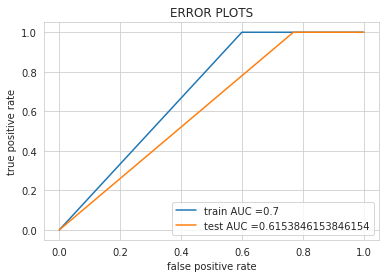

In [ ]:
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

test_AUC =str(auc(test_fpr, test_tpr))
plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.grid()
plt.legend()

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
print("="*100)
from sklearn.metrics import accuracy_score

print("trainaccurcay=",accuracy_score(y_tr, y_tr_pred))

print("testaccurcay=",accuracy_score(y_te, y_te_pred))

trainaccurcay= 0.7857142857142857
testaccurcay= 0.7142857142857143


In [ ]:
!pip3 install catboost

     |████████████████████████████████| 69.2MB 60kB/s 


In [ ]:
from catboost import CatBoostClassifier
# Initialize data


train_data = X_tr

cate_features_index = np.where(data.dtypes != float)[0]

train_labels = y_tr

eval_data = X_te

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.01,
                           depth=2)
# Fit model
model.fit(train_data, train_labels)
# Get predicted classes
preds_class = model.predict(eval_data)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_data)
# Get predicted RawFormulaVal
preds_class = model.predict(eval_data, prediction_type='Class')
pred_train = model.predict(X_tr,prediction_type='Class')
print("Predicted values=", preds_class)

0:	learn: 0.6881504	total: 50.2ms	remaining: 4.97s
1:	learn: 0.6830567	total: 51.1ms	remaining: 2.5s
2:	learn: 0.6783862	total: 52.7ms	remaining: 1.7s
3:	learn: 0.6751762	total: 53ms	remaining: 1.27s
4:	learn: 0.6715967	total: 53.2ms	remaining: 1.01s
5:	learn: 0.6666652	total: 53.5ms	remaining: 838ms
6:	learn: 0.6620282	total: 53.8ms	remaining: 714ms
7:	learn: 0.6575078	total: 54.9ms	remaining: 631ms
8:	learn: 0.6531151	total: 55.7ms	remaining: 563ms
9:	learn: 0.6490361	total: 56.8ms	remaining: 512ms
10:	learn: 0.6456360	total: 57.2ms	remaining: 463ms
11:	learn: 0.6414764	total: 57.6ms	remaining: 422ms
12:	learn: 0.6382810	total: 58ms	remaining: 388ms
13:	learn: 0.6341762	total: 58.4ms	remaining: 359ms
14:	learn: 0.6306469	total: 58.8ms	remaining: 333ms
15:	learn: 0.6265208	total: 59.1ms	remaining: 310ms
16:	learn: 0.6227486	total: 59.5ms	remaining: 291ms
17:	learn: 0.6189678	total: 59.9ms	remaining: 273ms
18:	learn: 0.6152382	total: 60.3ms	remaining: 257ms
19:	learn: 0.6115270	total: 

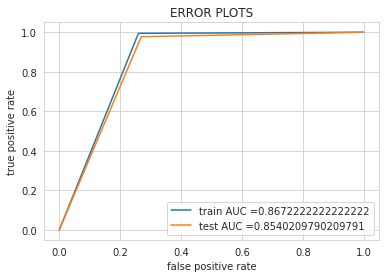

In [ ]:
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_tr, pred_train)
te_fpr, te_tpr, te_thresholds = roc_curve(y_te, preds_class)

test_AUC =str(auc(test_fpr, test_tpr))
plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.grid()
plt.legend()

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
print("="*100)
from sklearn.metrics import accuracy_score

print("trainaccurcay=",accuracy_score(y_tr, pred_train))

print("testaccurcay=",accuracy_score(y_te, preds_class))

print(classification_report(y_te, preds_class, target_names=target_names,zero_division=1))

trainaccurcay= 0.9035714285714286
testaccurcay= 0.8857142857142857
              precision    recall  f1-score   support

           g       0.95      0.73      0.83        26
           b       0.86      0.98      0.91        44

    accuracy                           0.89        70
   macro avg       0.91      0.85      0.87        70
weighted avg       0.89      0.89      0.88        70



#Deep learning models- As suggested in the research paper in Semantic Scholar https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf, 

In [ ]:
#Implementation using Tensorflow 2.0

import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#split the data into  train and test
#X_Normalized = MinMaxScaler().fit_transform(X_sliced)
#X_tr, X_te, y_tr, y_te = train_test_split(X_Normalized, Y_sliced, test_size=0.2, random_state=42)
#X_tr.shape , y_tr.shape, X_te.shape, y_te.shape

In [ ]:
#split the data into  train and test
X_normalized = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.30, random_state=42)
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((245, 34), (245,), (105, 34), (105,))

In [ ]:
#create the model
from tensorflow.keras.callbacks import EarlyStopping

#Input layer

input_layer = tf.keras.Input(shape=(34,))
#Dense hidden layer
layer1 = Dense(34,activation=tf.nn.relu,kernel_initializer='he_normal')(input_layer)
#Dense hidden layer
layer2 = Dense(34,use_bias=True,bias_initializer=tf.initializers.ones,activation=tf.nn.relu,kernel_initializer='he_normal')(layer1)
layer3 = Dense(34)(layer2)
layer4 = Dense(34)(layer3)
layer5 = Dense(34,use_bias=True,bias_initializer=tf.initializers.ones,activation=tf.nn.relu,kernel_initializer='he_normal')(layer4)
layer6 = Dense(34)(layer5)
layer7 = Dense(34)(layer6)
layer8 = Dense(34,use_bias=True,bias_initializer=tf.initializers.ones,kernel_initializer='random_normal')(layer7)
output = Dense(1,activation=tf.nn.sigmoid,kernel_initializer='glorot_normal')(layer8)
#Creating a model
ionosphere_radiowv_model = Model(inputs=input_layer,outputs=output)


#Callbacks
#file path, it saves the model in the 'model_save' folder and we are naming model with epoch number 
#and val acc to differtiate with other models
#you have to create model_save folder before running the code.


filepath="model_save/ionos_weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')
earlystop = EarlyStopping(monitor='val_accuracy',min_delta=0.1, patience=2, verbose=1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.011,beta_1=0.99,beta_2=0.999,epsilon=1e-07)

ionosphere_radiowv_model.compile(optimizer=optimizer,
              loss='binary_crossentropy',metrics=['accuracy'])

ionosphere_radiowv_model.fit(x=X_normalized, y=Y, batch_size=32, epochs=10, verbose=2, callbacks=[checkpoint,earlystop],validation_split=0.1)

Epoch 1/10
10/10 - 1s - loss: 1.0360 - accuracy: 0.4984 - val_loss: 0.7808 - val_accuracy: 0.1714

Epoch 00001: val_accuracy improved from -inf to 0.17143, saving model to model_save/ionos_weights-01-0.1714.hdf5
Epoch 2/10
10/10 - 0s - loss: 0.6565 - accuracy: 0.6127 - val_loss: 0.3427 - val_accuracy: 1.0000

Epoch 00002: val_accuracy improved from 0.17143 to 1.00000, saving model to model_save/ionos_weights-02-1.0000.hdf5
Epoch 3/10
10/10 - 0s - loss: 0.4640 - accuracy: 0.8095 - val_loss: 0.3207 - val_accuracy: 0.8286

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/10
10/10 - 0s - loss: 0.4035 - accuracy: 0.8508 - val_loss: 0.0707 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 00004: early stopping


In [ ]:
! mkdir -p saved_model
ionosphere_radiowv_model.save('saved_model/ionosphere_radiowv_model') 

INFO:tensorflow:Assets written to: saved_model/ionosphere_radiowv_model/assets


In [ ]:



print("layer1",ionosphere_radiowv_model.layers[0].get_weights())
print("layer2",ionosphere_radiowv_model.layers[1].get_weights())
print("layer3",ionosphere_radiowv_model.layers[2].get_weights())
print("layer4",ionosphere_radiowv_model.layers[3].get_weights())
print("layer5",ionosphere_radiowv_model.layers[4].get_weights())
print("layer6",ionosphere_radiowv_model.layers[5].get_weights())
print("layer7",ionosphere_radiowv_model.layers[6].get_weights())
print("layer8",ionosphere_radiowv_model.layers[7].get_weights())
#keras.utils.plot_model(model_opt4, 'model4.png', show_shapes=True)

loss, acc = ionosphere_radiowv_model.evaluate(X_test,  y_test, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100*acc))

layer1 []
layer2 [array([[-0.21412066,  0.38219252, -0.33608463, ..., -0.47346067,
         0.28854766, -0.23988125],
       [-0.19900922,  0.20598917, -0.21619762, ..., -0.17851491,
         0.07192285,  0.4853629 ],
       [ 0.48468867,  0.09971531,  0.10384894, ..., -0.59792244,
        -0.41400743, -0.18914883],
       ...,
       [ 0.02057293, -0.05809313, -0.34122926, ..., -0.50013036,
        -0.20032018, -0.2054074 ],
       [-0.29908517,  0.01277622, -0.12750848, ..., -0.22940597,
         0.06761456, -0.21898624],
       [ 0.10624442, -0.4154846 ,  0.4578641 , ...,  0.00559531,
        -0.20427054, -0.09769618]], dtype=float32), array([-0.00603216,  0.02883379, -0.07733472,  0.03586263,  0.04974177,
       -0.14614487, -0.11570861, -0.11876597, -0.01460306, -0.00875027,
       -0.12982234, -0.17350248, -0.09680845, -0.10885682,  0.08744622,
        0.10965287,  0.04608143, -0.1350583 , -0.15622434, -0.03963567,
       -0.04337937, -0.08526158,  0.08547908,  0.01632627, -0.126

In [ ]:
!ls saved_model/ionosphere_radiowv_model

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# load a model
loaded_model = tf.keras.models.load_model('saved_model/ionosphere_radiowv_model')

# Check its architecture
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 34)]              0         
_________________________________________________________________
dense (Dense)                (None, 34)                1190      
_________________________________________________________________
dense_1 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_2 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_4 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_5 (Dense)              (None, 34)                1190  

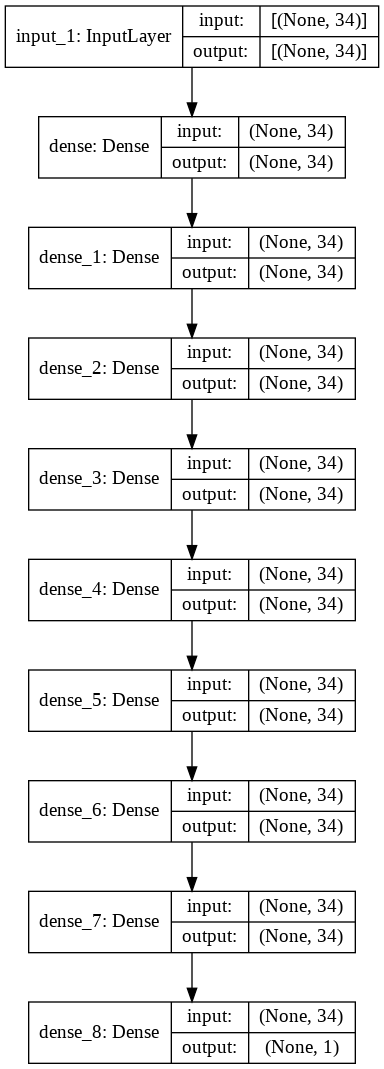

In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model

plot_model(ionosphere_radiowv_model, 'model.png', show_shapes=True)

##Implement Own custom Model and Layers for the architecture above and compare results
1. Input Layer dimension 34
2. Dense Layer dimension 34(5 such layers), activation relu , he normal initializer
3. Dense Layer dimension 34 , activation sigmoid , glorort normal initializer
4. Output classifier with 0 or 1

5. #Best practice: deferring weight creation until the shape of the inputs is known - from this link https://www.tensorflow.org/guide/keras/custom_layers_and_models
6. Write a custom Dense layer
7. Create a Custom model


In [ ]:
tf.keras.backend.clear_session() 

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
initializer_w = tf.keras.initializers.he_uniform()

In [ ]:
Y_reshaped = Y.reshape(len(Y),1)

In [ ]:
from tensorflow.keras import layers

class MyCustomDenseLayer(layers.Layer):

  def __init__(self, units=None,initializer_w = None):
    super(MyCustomDenseLayer, self).__init__()
    self.num_of_units = units
    self.initializer_w = initializer_w
    

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.num_of_units),
                             initializer=initializer_w)
    self.b = self.add_weight(shape=(self.num_of_units,),
                             initializer='random_normal')

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

  def get_config(self):
    return {'units': self.num_of_units , 'initializer_w':self.initializer_w }

In [ ]:
#Custom Model implementation - Two Layered MLP
##getModel() used for creating ensemble of models , encapsulate the private information about the model
#name used for Reflection .clazz need to check?
import tensorflow as tf
class TwoLayerIonosphereMLP(tf.keras.Model):

  def __init__(self, name=None):
    super(TwoLayerIonosphereMLP, self).__init__(name=name)    
    initializer_w = tf.keras.initializers.he_normal()
    initializer_w = tf.keras.initializers.glorot_normal()
    layer_1 = MyCustomDenseLayer(34,initializer_w)
    config_1 = layer_1.get_config()
    self.dense_1 = MyCustomDenseLayer(34, 'random_normal')
    self.dense_2 = MyCustomDenseLayer(34, 'random_normal')
    self.dense_3 = MyCustomDenseLayer(34, 'random_normal')
    self.dense_4 = MyCustomDenseLayer(34, 'random_normal')
    self.dense_5 = MyCustomDenseLayer(34, 'random_normal')
    self.dense_6 = MyCustomDenseLayer(1, 'random_normal')

  def call(self, inputs):
    x = self.dense_1(inputs)
    print("first layer ",x.shape)
    x = tf.nn.relu(x)
    x = self.dense_2(x)
    print("second layer ",x.shape)
    x = self.dense_3(x)
    print("third layer ",x.shape)
    x = self.dense_4(x)
    print("fourth layer ",x.shape)
    x = tf.nn.relu(x)
    x = self.dense_5(x)
    print("fifth layer ",x.shape)
    x = self.dense_6(x)
    print("sixth layer ",x.shape)
    x = tf.nn.sigmoid(x)
    return x

def get_model():
  return TwoLayerIonosphereMLP(name='ionospher_mlp') 

In [ ]:
import numpy as np
def my_func(arg):
  print("type of inp=", type(arg))
  arg = tf.convert_to_tensor(arg)
  print("shape of arg=",arg.shape)
  #tf.matmul(arg, arg) + arg
  return arg

In [ ]:
iono_mlp = get_model()
print(type(iono_mlp))
#X_normalized = np.zeros([10, 5])
#Y = np.zeros([10,1])
#substituting our model values of X and Y
X_tf = my_func(X_normalized)
y_tf = my_func(Y)
#X_tf = my_func(X_normalized)
#y_tf = my_func(Y)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.99,beta_2=0.999,epsilon=1e-07)
iono_mlp.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
iono_mlp.fit(x=X_normalized, y=Y_reshaped, batch_size=16, epochs=10, verbose=1,validation_split=0.20)

<class '__main__.TwoLayerIonosphereMLP'>
type of inp= <class 'numpy.ndarray'>
shape of arg= (350, 34)
type of inp= <class 'numpy.ndarray'>
shape of arg= (350,)
Epoch 1/10
first layer  (None, 34)
second layer  (None, 34)
third layer  (None, 34)
fourth layer  (None, 34)
fifth layer  (None, 34)
sixth layer  (None, 1)
first layer  (None, 34)
second layer  (None, 34)
third layer  (None, 34)
fourth layer  (None, 34)
fifth layer  (None, 34)
sixth layer  (None, 1)
 1/18 [>.............................] - ETA: 11s - loss: 0.7865 - accuracy: 0.4375first layer  (None, 34)
second layer  (None, 34)
third layer  (None, 34)
fourth layer  (None, 34)
fifth layer  (None, 34)
sixth layer  (None, 1)
18/18 [==============================] - 1s 11ms/step - loss: 0.6116 - accuracy: 0.6464 - val_loss: 0.7154 - val_accuracy: 0.6286
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.7929 - val_loss: 0.3300 - val_accuracy: 0.8714
Epoch 3/10
18/18 [=======================

In [ ]:
iono_mlp.evaluate(X_test,y_test)

first layer  (None, 34)
second layer  (None, 34)
third layer  (None, 34)
fourth layer  (None, 34)
fifth layer  (None, 34)
sixth layer  (None, 1)
4/4 [==============================] - 0s 3ms/step - loss: 0.1515 - accuracy: 0.9429


[0.15154841542243958, 0.9428571462631226]

##*Conclusion*
## 1. With the mannual implementation of LinearSVM with SGD, the results of accuracy , weights, bias are equal to implementation with linear_model SGD classifier with hinge loss.
### 2. In order to improve the accuracy , maybe we could drop few features not important in dataset, probably when the radio waves reaches earth , they may atmospheric noise/ radio noise interfere with the actual signals, readings recorded at the ground station receivers may be incorrect consequently those features may not be important. I need to identify those features and drop it from the dataframe and try to do analysis and see if the scores improve.
##Selecting the top 5 best features using SelectKBest from sklearn library , the score_func is f_classif, got top 5 best features.
### On this new model built applied LinearSVM with SGD hinge loss , but the accuracy score did not improve inspite of the learning rate changed
### Used Gradient Boosting algorithm on Decision Trees, In this case chose CatBoostClassifier with learning_rate =0.01, iterations =100 , test accuracy achieved = 88.5 %
##According to the research paper , https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf, they have proposed 2 models , one is the perceptron or the linear model , their output is clamped to the input and hence output is an identity function, range of the function can be from -infinity to +infinity. They are using a MSE minimization here. According to that they got accuracy of 94% on test set.
### In our case instaed of a linear function we used a simple , catboostclassifier with cross entrpoy as the loss and we got accuracy of the model to be 91%
##Next we tried to implement a simple functional API using Keras for this.
###In the research paper they have tred 3,4,5,8,15 hidden layers
###But in my experiment I tried only 5 layers with various activations and bias at each layer.
##That model got a test accuracy of 82.86%
##Finally we implemented Custom layer and simple 5 layeres model with relu activation , no bias. With this a test accuracy of 98.09% was achieved.
### In teh paper its also stated 
## "It would, however, be useful to 
##ascertain whether a neural network could also be used to determine
##the causeof a bad return (e.g., absence of identifiable structure,incoherent scattering, absorption of radar pulses, interference from the transmitters). On the basis of our experience we believe that MLFN'S should be useful in such an error analysis." _It would be interesting to find out that paper and try out the various causes for bad returns using MLFN.